In [1]:
Sys.setenv(LANG="en_US.UTF-8")
Sys.setenv(LC_ALL="en_US.UTF-8")

In [2]:
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(dplyr))

In [3]:
data_new <- readRDS(file = "./updated_seurat_clustering/Placenta_seuratobj_merged_final_22012021.rds")

data_new

table(Idents(data_new))

An object of class Seurat 
30426 features across 101031 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap


      c14_cells dDSC_14       c14_cells dSMC_14     c15_cells vMSC_15.2 
                   1069                     890                     259 
    c15_cells vSCT_15.3     c15_cells vVCT_15.1                  dDC_33 
                    899                     572                     177 
                 dEpC_4                  dFB_21         dGranulocyte_30 
                   7065                     955                     357 
                dLEC_11           dLEC_dysfn_36             dMac_act_10 
                   2797                      52                    2985 
            dMac_clas_6                dMono_31             dNK_prol_29 
                   6591                     248                     462 
                 dNK1_5                 dNK2_12          dPlasmaCell_27 
                   6631                    2761                     551 
        dSCT_inflamm_28                dTcell_7                 dVEC_16 
                    539                    4943   

In [3]:
#Restart the subclustering: read the 17.01.2021 file with cluster numbers: 
data <- readRDS(file = "./updated_seurat_clustering/Merged_placenta_seuratobj_final_17012021.rds")

data

An object of class Seurat 
30426 features across 101031 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [4]:
table(Idents(data)) #Initial annotation. 


    0     1     2     3     4     5     6     7     8     9    10    11    12 
11978 10295  8707  7928  7065  6631  6591  4943  4561  4437  2985  2797  2761 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
 2246  1959  1730  1660  1193  1175  1105   983   955   811   720   697   693 
   26    27    28    29    30    31    32    33    34    35    36 
  676   551   539   462   357   248   184   177   115    64    52 

In [5]:
#Initial annotation: goal => segregate DSC, SMC & FB for fibroblasts. 

current.cluster.ids <- c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36)

#Initial mapping to cell types (annotations) to the Louvain clustering: 
cell_type_merged <- c("vSCT_1", "vSCT_1", "vSCT_1", "vSCT_1", "dEpithelial_cell", "dNK_1", "dMAC_classical",
                      "dTcell", "vVCT", "vSCT_2", "dMAC_activated", "dLymphatic_EC", "dNK_2", "vHoffbauer_cell", "dClus_14",
                      "vClus_15", "dVascular_EC", "vVCT_prol", "vTcell", "vVascular_EC", "vErythroblast", "dFibroblast", "vFibroblast",
                      "vDendritic_cell", "vTrophoblast_stem", "vMC", "vEVT", "dPlasmaCell", "dSCT_inflamm_28", "dNK_prol", 
                      "dGranulocyte", "dMonocyte", "vErythroblast", "dDendritic_cell", "vBcell", "Unclassified_35", 
                      "dLEC_dysfunctional")



#data@ident <- plyr::mapvalues(x = data@integrated_snn_res.1, from = current.cluster.ids, to = new.cluster.ids)

names(x = cell_type_merged) <- levels(x = data)

data <- RenameIdents(object = data, cell_type_merged)

table(Idents(data))


            vSCT_1   dEpithelial_cell              dNK_1     dMAC_classical 
             38908               7065               6631               6591 
            dTcell               vVCT             vSCT_2     dMAC_activated 
              4943               4561               4437               2985 
     dLymphatic_EC              dNK_2    vHoffbauer_cell           dClus_14 
              2797               2761               2246               1959 
          vClus_15       dVascular_EC          vVCT_prol             vTcell 
              1730               1660               1193               1175 
      vVascular_EC      vErythroblast        dFibroblast        vFibroblast 
              1105               1167                955                811 
   vDendritic_cell  vTrophoblast_stem                vMC               vEVT 
               720                697                693                676 
       dPlasmaCell    dSCT_inflamm_28           dNK_prol       dGranulocyte

In [6]:
data <- StashIdent(object = data, save.name = "cell_type_merged")

Idents(object= data) <- 'cell_type_merged'

table(Idents(data)) 

With Seurat 3.X, stashing identity classes can be accomplished with the following:
data[["cell_type_merged"]] <- Idents(object = data)




            vSCT_1   dEpithelial_cell              dNK_1     dMAC_classical 
             38908               7065               6631               6591 
            dTcell               vVCT             vSCT_2     dMAC_activated 
              4943               4561               4437               2985 
     dLymphatic_EC              dNK_2    vHoffbauer_cell           dClus_14 
              2797               2761               2246               1959 
          vClus_15       dVascular_EC          vVCT_prol             vTcell 
              1730               1660               1193               1175 
      vVascular_EC      vErythroblast        dFibroblast        vFibroblast 
              1105               1167                955                811 
   vDendritic_cell  vTrophoblast_stem                vMC               vEVT 
               720                697                693                676 
       dPlasmaCell    dSCT_inflamm_28           dNK_prol       dGranulocyte

In [7]:
#Subset DSC cells & FB from decidua: 


subset = c("dClus_14", "dFibroblast") 
seurat_c14 = subset(data, idents = subset) 

#seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])
seurat_c14

table(Idents(seurat_c14))

DefaultAssay(seurat_c14) <- "RNA"

#Recompute HVG for the subset: 
seurat_c14 <- FindVariableFeatures(seurat_c14, selection.method = "vst")

seurat_c14@assays$RNA

An object of class Seurat 
30426 features across 2914 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap


   dClus_14 dFibroblast 
       1959         955 

Assay data with 26115 features for 2914 cells
Top 10 variable features:
 SEMA3A, FBN2, LINC01320, RIMKLB, COL1A1, ACTG2, REN, IGFBP1, PARPBP,
RHEX 

In [8]:
#DefaultAssay(seurat_c14) <- "RNA"

#Recompute HVG for the subset: 
#seurat_c14 <- FindVariableFeatures(seurat_c14, selection.method = "vst")

#seurat_c14@assays$RNA

hvg_features = VariableFeatures(object = seurat_c14)

head(hvg_features)

[1] "SEMA3A"    "FBN2"      "LINC01320" "RIMKLB"    "COL1A1"    "ACTG2"

In [9]:
#recalculate again but keep the UMAP same for comparison. 

#Change to integrated: 

DefaultAssay(seurat_c14) <- "integrated"

#Rescale the data prior to subclustering: 
seurat_c14 <- ScaleData(seurat_c14, features= hvg_features)

#Compute PCA: 
seurat_c14 <- RunPCA(seurat_c14, verbose = FALSE, features= hvg_features)

Centering and scaling data matrix



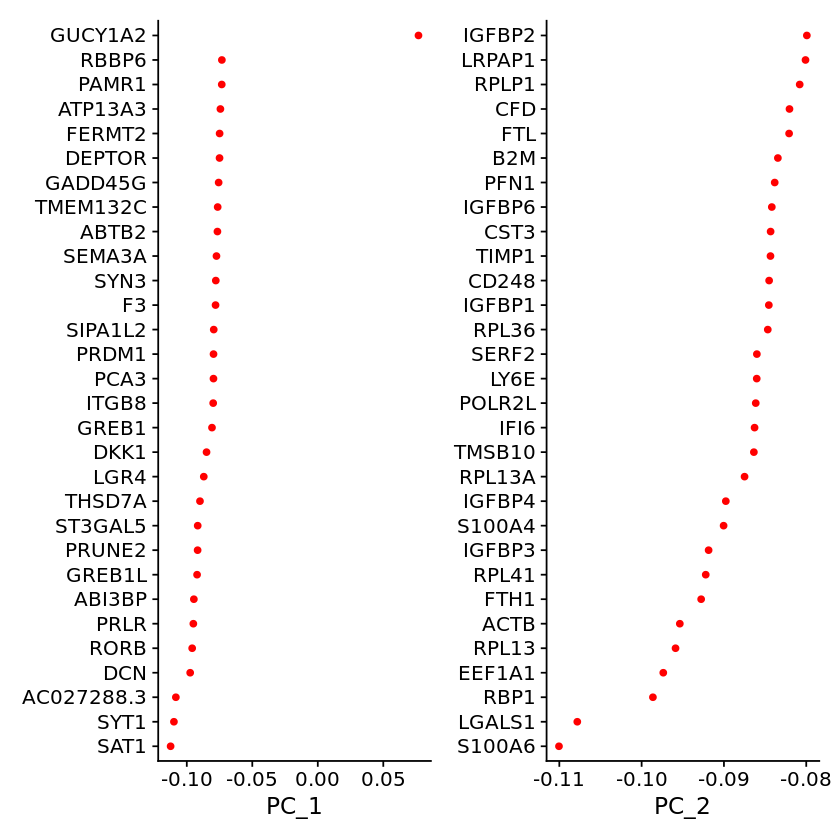

In [10]:
#Visualize the genes ranked by loading values encoded by PC1 & PC2. 
#For example, GUCY1A2 is a marker of dSMC => PC1 characterizes Smooth muscle cells. 
VizDimLoadings(object = seurat_c14, dims= 1:2, col= "red")

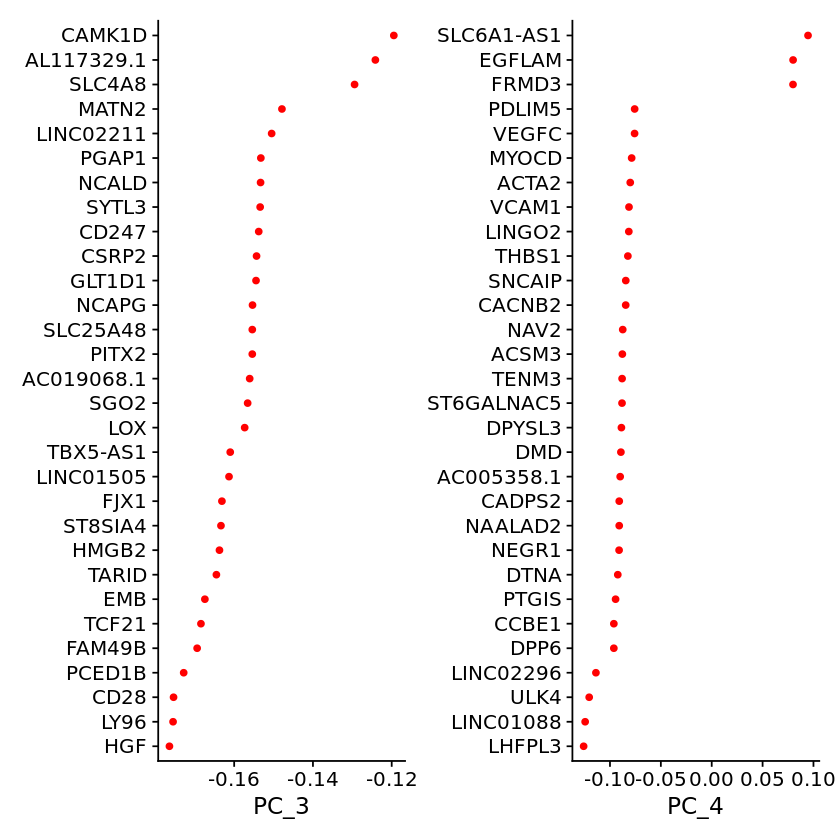

In [11]:
VizDimLoadings(object = seurat_c14, dims= 3:4, col= "red")

In [12]:
seurat_c14@assays$RNA

Assay data with 26115 features for 2914 cells
Top 10 variable features:
 SEMA3A, FBN2, LINC01320, RIMKLB, COL1A1, ACTG2, REN, IGFBP1, PARPBP,
RHEX 

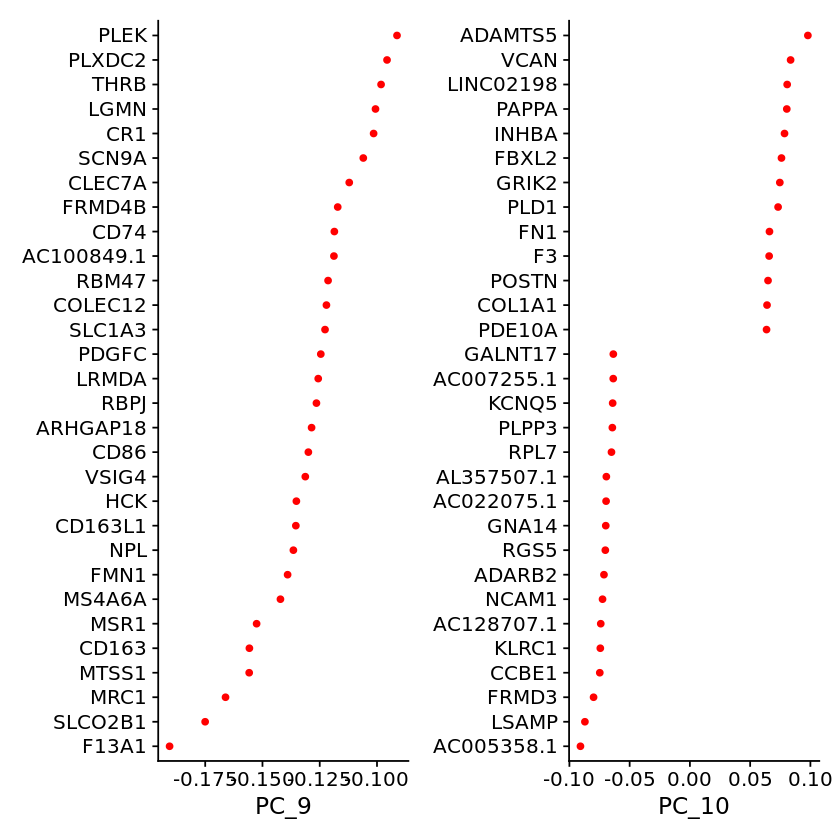

In [13]:
VizDimLoadings(object = seurat_c14, dims= 9:10, col= "red") #PC8 is FB. 

In [16]:
#VizDimLoadings(object = seurat_c14, dims= 11:12, col= "red") #PC8 is FB. 

In [24]:
#Run ICA to verify the C14 & C21-FB subsets:
seurat_c14 <- RunICA(seurat_c14, verbose = TRUE, features= hvg_features, ica.function = "icafast", nics = 15)

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 443 features requested have not been scaled (running reduction without them): PLCG2, PFKFB4, LINC01435, ABCB5, AC016708.1, UQCR11, CD82, PLEKHA7, BAIAP2L1, HIST1H4E, PMEL, KPNA2, GLUD1, ESCO2, LRRC7, RPS24, RPL7A, AP001372.1, UQCRQ, GCLC, PSD, LINC00243, RPL15, HOXB2, CCDC34, RPL14, SSR3, RPS29, PMAIP1, RPL10, RPS27, FAU, TPI1, AC079305.1, COX7C, CLVS2, EMC7, IQANK1, ACVR1C, DAPP1, MRPS30-DT, EBF2, SEMA7A, HCN1, COX7A2, HSPA5, AC099687.1, RPS9, UQCR10, C4orf3, GLRA2, RPL37, TMEM258, PRKCH, TIPARP, AC090791.1, PDYN-AS1, ATP1B3, RAB11FIP1, RPL10A, NDUFB2, KCNA2, TNNT2, NRN1, CASC6, IGF2-AS, MUC15, FZD10, CLN3, AC004156.1, KLK12, LRRC3, LINC00691, AP002754.1, AC069549.1, TRAV22, HGD, RSPH1, PRDX5, PLAG1, MTBP, KIFC1, TACC3, MDFIC2, AC026347.1, PPIA, SNX30, AC015914.1, AL021391.1, C2orf50, ZDHHC11, AC104151.1, SERPINB2, MYDGF, CDYL2, C4orf48, AMPD3, BRINP1, AP001208.2, ROMO1, SLC47A1, BCO2, G

IC_ 1 
Positive:  GUCY1A2, SLC6A1-AS1, CPM, COL18A1, SULF1, ADGRF5, PCSK5, ADGRL3, JAG1, EGFLAM 
	   GEM, ABCC9, TEX41, NOTCH3, MEF2C, FHL5, RGS5, CCDC102B, ITGA7, NCKAP5 
	   GUCY1A1, LZTS1-AS1, PDE3A, ADARB2, LURAP1L, RCAN2, NEURL1B, COL5A3, STEAP4, FIGN 
Negative:  AC027288.3, SYT1, THSD7A, SAT1, ULK4, DCN, RORB, DTNA, VCAN, PRLR 
	   CACNB2, DKK1, PAPPA, NAV3, DPP6, CLMP, LSAMP, ST3GAL5, SNCAIP, GREB1L 
	   GREB1, ABTB2, LUM, ITGB8, CFH, FERMT2, F3, PRUNE2, SIPA1L2, PDE10A 
IC_ 2 
Positive:  AC019068.1, PITX2, SLC25A48, NCAPG, SGO2, CSRP2, LOX, CD247, SYTL3, NCALD 
	   LINC02211, TBX5-AS1, MATN2, FJX1, ST8SIA4, TARID, EMB, TCF21, HGF, LY96 
	   CD28, KLHL14, PCED1B, FAM84A, FAM49B, HMGB2, PLA2G4A, LINC01505, TENM2, GLT1D1 
Negative:  CSH1, PSG4, CSH2, CSHL1, PSG1, KISS1, AL356275.1, EML6, PSG6, ELMO1 
	   SKAP1, ARHGAP26, FLI1, NOS1AP, IQGAP2, JAKMIP2, PTPRJ, AC246817.2, AC010175.1, AC114689.3 
	   DOCK8, RARRES1, AC025580.2, MIR646HG, SYK, PPP1R9A, SNTB1, MGAT4A, AC092078.2, CD96 

In [14]:
#Continue with PC & compute nearest neighbor graph: 
seurat_c14 <- FindNeighbors(seurat_c14, dims = 1:10, force.recalc = T)

seurat_c14 <- FindClusters(seurat_c14, resolution = 0.5, algorithm=2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2914
Number of edges: 96781

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.8706
Number of communities: 11
Elapsed time: 0 seconds


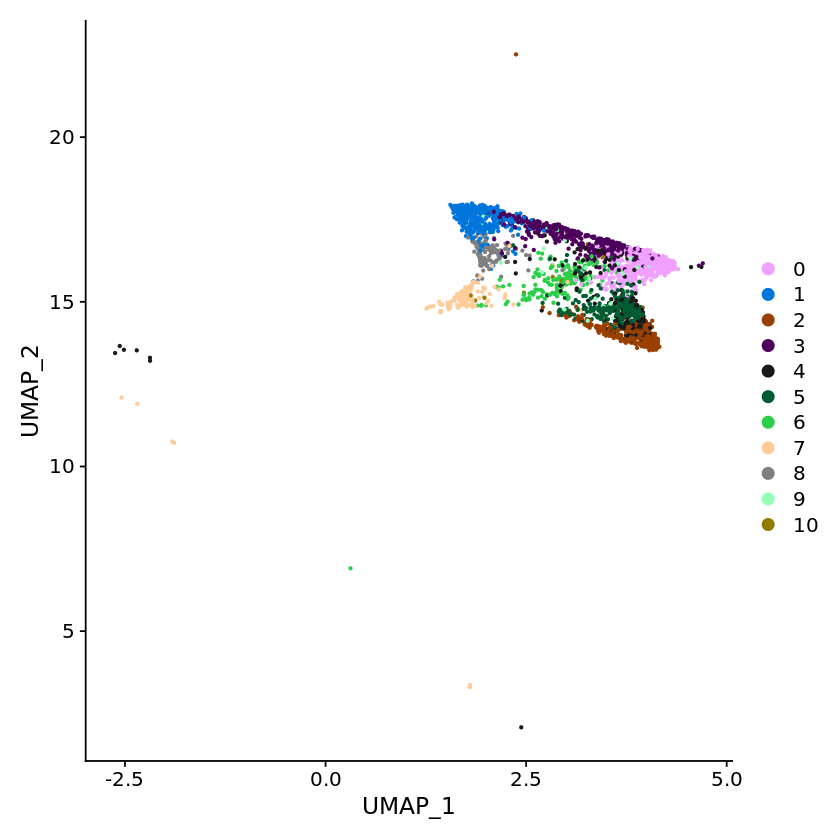

In [15]:
#Visualize subclustering: 
#Later subclusters are projected onto the latest UMAP. 
UMAPPlot(object= seurat_c14, cols= "alphabet")

In [111]:
pdf("DSC_subcluster_28012021.pdf", w=5, h=5, paper= "special")

UMAPPlot(object= seurat_c14, cols= "alphabet") #Multi.L

dev.off()

png 
  2

In [16]:
colnames(seurat_c14@meta.data)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "stim"                   "percent.mt"             "S.Score"               
 [7] "G2M.Score"              "Phase"                  "old.ident"             
[10] "integrated_snn_res.0.5" "seurat_clusters"        "group"                 
[13] "disease"                "time"                   "tissue"                
[16] "tissue_time"            "integrated_snn_res.1"   "integrated_snn_res.2"  
[19] "integrated_snn_res.3"   "cell_type"              "RNA_snn_res.0.8"       
[22] "Merged_cell_type_PC35"  "cell_type_merged"       "nCount_integrated"     
[25] "nFeature_integrated"

In [24]:
#Composition (numbers) per subcluster of decidua mesenchymal lineage
Idents(object= seurat_c14) <- 'integrated_snn_res.0.5'

table(Idents(seurat_c14))


  0   1   2   3   4   5   6   7   8   9  10 
518 461 430 425 292 264 173 165 118  41  27 

In [25]:
#Latest annotations: taking preliminary trajectory analysis, marker analysis & PAGA results along with the above UMAP into account. 
#C5 (dFB_2): former Myofibroblasts

#Map the Louvain subclusters to cluster names: 
seurat_c14 <- RenameIdents(object = seurat_c14,  '0' = 'dMesenchymal', '1' = 'DSC_1', '2' = 'dSMC', '3'= 'DSC_1', 
                           '4'= 'dSMC', '5'= 'dFB_2', '6'= 'dFB_1', '7'= 'DSC_2', '8'= 'DSC_1', '9'= 'dFB_1',
                          '10'= 'DSC_2')

seurat_c14 <- StashIdent(object = seurat_c14, save.name = "C14_subclusters")

#Set the cluster ident to "C14_subclusters"
Idents(object= seurat_c14) <- 'C14_subclusters'

table(Idents(seurat_c14)) 

With Seurat 3.X, stashing identity classes can be accomplished with the following:
seurat_c14[["C14_subclusters"]] <- Idents(object = seurat_c14)




dMesenchymal        DSC_1         dSMC        dFB_2        dFB_1        DSC_2 
         518         1004          722          264          214          192 

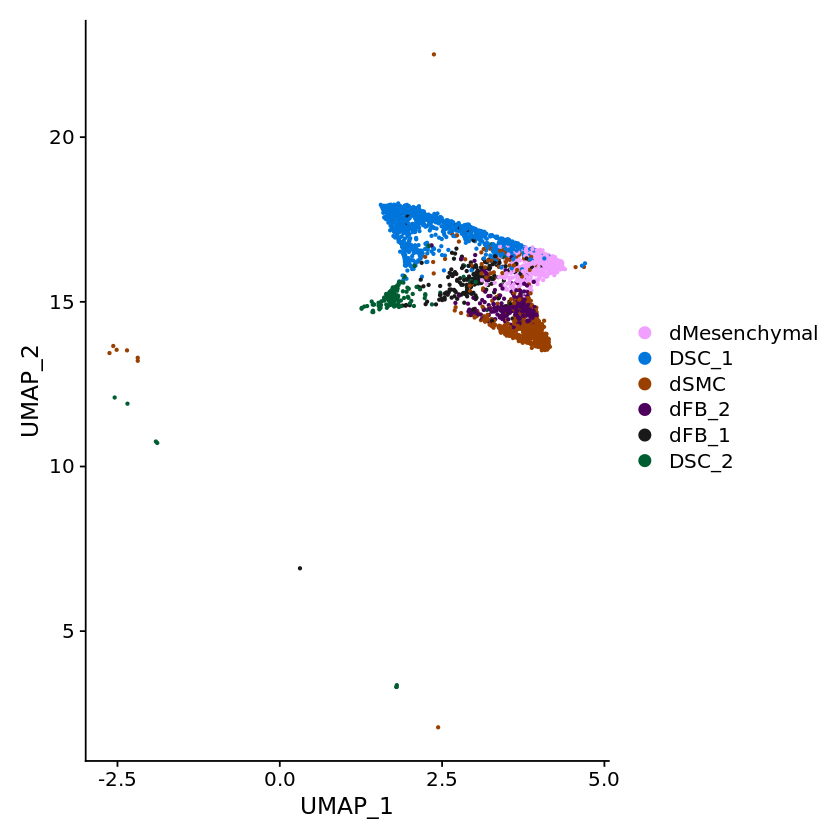

In [26]:
UMAPPlot(object= seurat_c14, cols= "alphabet")

In [28]:
#Find Markers: old
DefaultAssay(seurat_c14) <- "RNA"

all.markers= FindAllMarkers(seurat_c14, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, test.use= "negbinom")

head(all.markers)

write.csv(all.markers, file= "Final_DSCFB_subcluster14_markers_NegBinom.csv")

Calculating cluster dMesenchymal

Calculating cluster DSC_1

Calculating cluster dSMC

Calculating cluster dFB_2

Calculating cluster dFB_1

Calculating cluster DSC_2



,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CADPS2,1.393597e-69,0.8705126,0.529,0.222,3.639377e-65,dMesenchymal,CADPS2
LHFPL3,7.361177e-56,1.0870941,0.710,0.165,1.922371e-51,dMesenchymal,LHFPL3
LINC02296,8.677720e-56,1.2436319,0.788,0.235,2.266187e-51,dMesenchymal,LINC02296
MITF,2.365602e-52,0.6191685,0.790,0.414,6.177770e-48,dMesenchymal,MITF
EPHA6,9.237081e-49,0.3387812,0.286,0.061,2.412264e-44,dMesenchymal,EPHA6
TENM3,2.011309e-48,0.3786530,0.349,0.089,5.252534e-44,dMesenchymal,TENM3


In [29]:
DefaultAssay(seurat_c14) <- "RNA"

all.markers.LR = FindAllMarkers(seurat_c14, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, test.use= "LR")

head(all.markers.LR)

write.csv(all.markers.LR, file= "Final_DSCFB_subcluster14_markers_LogisticRegression.csv")

Calculating cluster dMesenchymal

Calculating cluster DSC_1

Calculating cluster dSMC

Calculating cluster dFB_2

Calculating cluster dFB_1

Calculating cluster DSC_2



,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
LINC02296,1.263238e-175,1.892215,0.788,0.235,3.298946e-171,dMesenchymal,LINC02296
LHFPL3,1.253693e-145,1.679931,0.710,0.165,3.274019e-141,dMesenchymal,LHFPL3
ULK4,2.760592e-136,1.251242,0.919,0.517,7.209285e-132,dMesenchymal,ULK4
MIR99AHG,1.057587e-120,1.071544,0.915,0.543,2.761889e-116,dMesenchymal,MIR99AHG
RORA,3.963232e-120,1.014986,0.965,0.693,1.034998e-115,dMesenchymal,RORA
LINGO2,1.482657e-88,1.116978,0.649,0.215,3.871960e-84,dMesenchymal,LINGO2


In [27]:
pdf("Final_DSC_subcluster_28012021.pdf", w=5, h=5, paper= "special")

UMAPPlot(object= seurat_c14, cols= "alphabet") #Multi.L

dev.off()

png 
  2

In [20]:
#Old annotation: plotted in the dMSC trajectory analysis:
#Mainly to see the position of the clusters in pseudotime. 
seurat_c14 <- RenameIdents(object = seurat_c14,  '0' = 'Cl-0', '1' = 'Cl-1', '2' = 'Cl-2', '3'= 'Cl-3', 
                           '4'= 'Cl-4', '5'= 'Cl-5', '6'= 'Cl-6', '7'= 'Cl-7', '8'= 'Cl-8', '9'= 'Cl-9',
                          '10'= 'Cl-10')

seurat_c14 <- StashIdent(object = seurat_c14, save.name = "C14_subclusters")

Idents(object= seurat_c14) <- 'C14_subclusters'

table(Idents(seurat_c14)) 

With Seurat 3.X, stashing identity classes can be accomplished with the following:
seurat_c14[["C14_subclusters"]] <- Idents(object = seurat_c14)




 Cl-0  Cl-1  Cl-2  Cl-3  Cl-4  Cl-5  Cl-6  Cl-7  Cl-8  Cl-9 Cl-10 
  518   461   430   425   292   264   173   165   118    41    27 

In [21]:
colnames(seurat_c14@meta.data)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "stim"                   "percent.mt"             "S.Score"               
 [7] "G2M.Score"              "Phase"                  "old.ident"             
[10] "integrated_snn_res.0.5" "seurat_clusters"        "group"                 
[13] "disease"                "time"                   "tissue"                
[16] "tissue_time"            "integrated_snn_res.1"   "integrated_snn_res.2"  
[19] "integrated_snn_res.3"   "cell_type"              "RNA_snn_res.0.8"       
[22] "Merged_cell_type_PC35"  "cell_type_merged"       "nCount_integrated"     
[25] "nFeature_integrated"    "C14_subclusters"

In [22]:
#Subset data by "hvg features" (highly variable features) used for subclustering: 
seurat_c14_hvg= subset(seurat_c14, features= hvg_features)
seurat_c14_hvg

An object of class Seurat 
3557 features across 2914 samples within 2 assays 
Active assay: integrated (1557 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [27]:
seurat_c14_hvg@assays$RNA #normalized/raw count data is stored in "RNA" slot. 

Assay data with 2000 features for 2914 cells
Top 10 variable features:
 SEMA3A, FBN2, LINC01320, RIMKLB, COL1A1, ACTG2, REN, IGFBP1, PARPBP,
RHEX 

In [39]:
dim(seurat_c14_hvg@assays$RNA@data)

[1] 2000 2914

In [37]:
dim(seurat_c14_hvg@assays$integrated@data)

[1] 1557 2914

In [48]:
library(dplyr)
library(Matrix)

Warning message:
“package ‘Matrix’ was built under R version 3.6.2”

Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [49]:
#Export normalized & integrated matrix for trajectory (Scanpy/Stream) analysis:


writeMM(seurat_c14_hvg@assays$RNA@data, "./DSC_trajectory_final/DSC.norm_counts.mtx")
write.table(seurat_c14_hvg@assays$RNA@data@Dimnames[[1]], "./DSC_trajectory_final/DSC.genes.txt",row.names = FALSE,quote = FALSE,col.names = FALSE,sep = "\n")
write.table(seurat_c14_hvg@assays$RNA@data@Dimnames[[2]], "./DSC_trajectory_final/DSC.cell_barcodes.txt",row.names = FALSE,quote = FALSE,col.names = FALSE,sep = "\n")

#Export metadata:
df <- seurat_c14_hvg@meta.data
write.csv(data.frame(df), file = "./DSC_trajectory_final/DSC.metadata.csv",row.names = TRUE)


NULL

In [50]:
#Export metadata:
df <- seurat_c14_hvg@meta.data
write.csv(data.frame(df), file = "./DSC_trajectory_final/DSC.metadata.csv",row.names = TRUE)


#Save the integrated matrix for learning the trajectory: (already re-scaled)
writeMM(seurat_c14_hvg@assays$integrated@data, "./DSC_trajectory_final/DSC.integrated.norm_counts.mtx")

write.table(seurat_c14_hvg@assays$integrated@data@Dimnames[[1]], "./DSC_trajectory_final/DSC.integrated.genes.txt",row.names = FALSE,quote = FALSE,col.names = FALSE,sep = "\n")
write.table(seurat_c14_hvg@assays$integrated@data@Dimnames[[2]], "./DSC_trajectory_final/DSC.integrated.cell_barcodes.txt",row.names = FALSE,quote = FALSE,col.names = FALSE,sep = "\n")

NULL

In [113]:
Idents(object= seurat_c14) <- 'cell_type_merged'

table(Idents(seurat_c14))

pdf("DSC_subcluster_28012021_Overlaid_anno.pdf", w=5, h=5, paper= "special")

UMAPPlot(object= seurat_c14, cols= "alphabet") #Multi.L

dev.off()


dClus_14   dFB_21 
    1959      955 

png 
  2

In [84]:
#Find Markers using 'Negative Binomial':
DefaultAssay(seurat_c14) <- "RNA"

all.markers= FindAllMarkers(seurat_c14, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, test.use= "negbinom")

head(all.markers)

write.csv(all.markers, file= "C14_C21_DSCFB_markers_28012021_NegBinom.csv")

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Calculating cluster 10

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in t

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CADPS2,1.393597e-69,0.8705126,0.529,0.222,3.639377e-65,0,CADPS2
LHFPL3,7.361177e-56,1.0870941,0.710,0.165,1.922371e-51,0,LHFPL3
LINC02296,8.677720e-56,1.2436319,0.788,0.235,2.266187e-51,0,LINC02296
MITF,2.365602e-52,0.6191685,0.790,0.414,6.177770e-48,0,MITF
EPHA6,9.237081e-49,0.3387812,0.286,0.061,2.412264e-44,0,EPHA6
TENM3,2.011309e-48,0.3786530,0.349,0.089,5.252534e-44,0,TENM3


In [93]:
#Marker analysis using Multivariate Logistic Regression: 
#MAST will yield very similar results since it's based on LR model. 
all.markers= FindAllMarkers(seurat_c14, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, test.use= "LR")

head(all.markers)

write.csv(all.markers, file= "C14_C21_DSCFB_markers_28012021_LogReg.csv")

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10



,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
LINC02296,1.263238e-175,1.892215,0.788,0.235,3.298946e-171,0,LINC02296
LHFPL3,1.253693e-145,1.679931,0.710,0.165,3.274019e-141,0,LHFPL3
ULK4,2.760592e-136,1.251242,0.919,0.517,7.209285e-132,0,ULK4
MIR99AHG,1.057587e-120,1.071544,0.915,0.543,2.761889e-116,0,MIR99AHG
RORA,3.963232e-120,1.014986,0.965,0.693,1.034998e-115,0,RORA
LINGO2,1.482657e-88,1.116978,0.649,0.215,3.871960e-84,0,LINGO2


In [83]:
Idents(object= seurat_c14) <- 'integrated_snn_res.0.5'

table(Idents(seurat_c14))


  0   1   2   3   4   5   6   7   8   9  10 
518 461 430 425 292 264 173 165 118  41  27 

In [97]:
#FeaturePlot(seurat_c14, features= c("COL1A1", "DLC1", "COL1A2", "SLIT3", "COL3A1"))
#You can avoid quantile scaling by setting min.cutoff to 0 (instead of 'q10' or similar),

pdf("DSC_lineage_genes_Default.pdf", w=9, h=20, paper= "special")

FeaturePlot(seurat_c14, features= c("TWIST2", "YAP1", "EGFR", "SOX5",
                                   "COL1A1", "COL6A2", "COL5A2", "COL6A1", "COL3A1", "COL4A2", 
                          "COL6A3", "COL4A1", "SPARC", "COL18A1", "PDGFRB", "MYH1", "RGS5", "ACTA2", 
                          "DLC1", "COL1A2", "SLIT3", "GUCY1A2", "AFF2", "ITGA1"), 
            order=TRUE, cols = c("blue", "green", "red"), ncol=3, min.cutoff=0) 

dev.off() 

png 
  2

In [110]:
pdf("DSC_Stemness_genes_Default.pdf", w=9, h=22, paper= "special")

FeaturePlot(seurat_c14, features= c("TWIST2", "YAP1", "EGFR", "SOX5", "ZEB1", "ABCG2", "OCT4", "NT5E", "THY1", "VIM", 
                                   "ZEB2", "FOXO1", "FOXO2", "ONECUT2", "CD10", "MME", "ANPEP", "ITGB1", "POU5F1", 
                                   "ONECUT3", "FOXO3", "SOX6", "KRT19", "NANOG", "CD34", "DES", "NES", "APC"), 
            order=TRUE, cols = c("blue", "green", "red"), ncol=3, min.cutoff=0) 

dev.off() 

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: OCT4, FOXO2, CD10”


png 
  2

In [100]:
pdf("DSC_lineage_genes_QuantileScaling_Q95.pdf", w=9, h=20, paper= "special")

FeaturePlot(seurat_c14, features= c("TWIST2", "YAP1", "EGFR", "SOX5",
                                   "COL1A1", "COL6A2", "COL5A2", "COL6A1", "COL3A1", "COL4A2", 
                          "COL6A3", "COL4A1", "SPARC", "COL18A1", "PDGFRB", "MYH1", "RGS5", "ACTA2", 
                          "DLC1", "COL1A2", "SLIT3", "GUCY1A2", "AFF2", "ITGA1"), 
            order=TRUE, cols = c("blue", "green", "red"), ncol=3, min.cutoff= "q10", max.cutoff = "q95") 

dev.off() 

png 
  2

In [98]:
pdf("DSC_lineage_genes_Default_FullUMAP.pdf", w=9, h=30, paper= "special")


FeaturePlot(data, features= c("TWIST2", "YAP1", "EGFR", "SOX5",
                                   "COL1A1", "COL6A2", "COL5A2", "COL6A1", "COL3A1", "COL4A2", 
                          "COL6A3", "COL4A1", "SPARC", "COL18A1", "PDGFRB", "MYH1", "RGS5", "ACTA2", 
                          "DLC1", "COL1A2", "SLIT3", "GUCY1A2", "AFF2", "ITGA1"), 
            order=TRUE, cols = c("blue", "green", "red"), ncol=3, min.cutoff=0) 

dev.off() 

png 
  2

In [31]:
seurat_c14

An object of class Seurat 
30426 features across 2914 samples within 2 assays 
Active assay: RNA (26115 features)
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

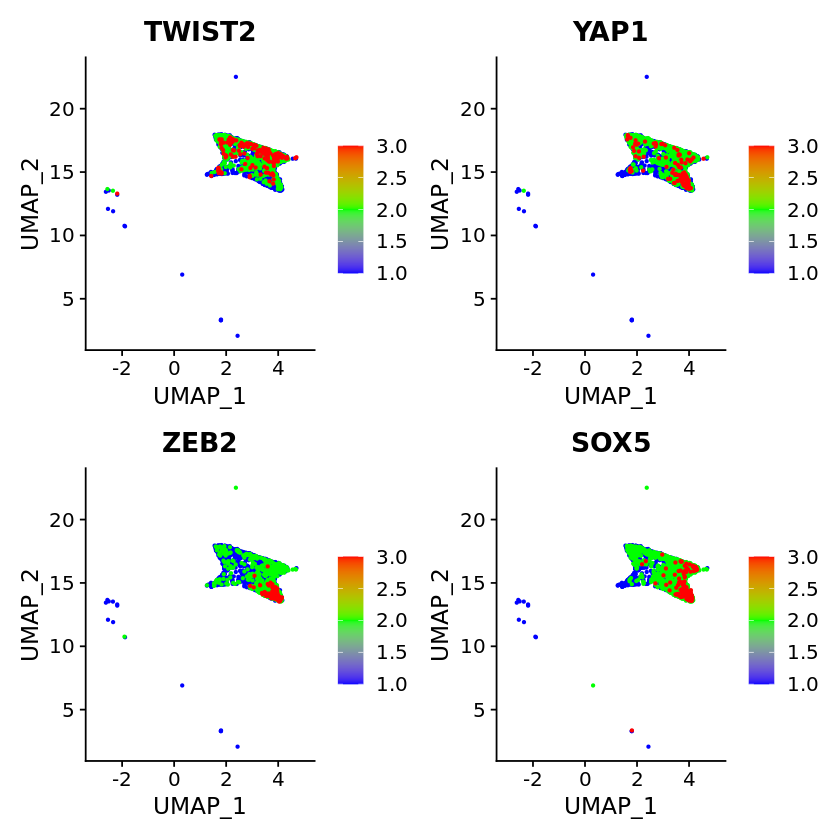

In [32]:
FeaturePlot(seurat_c14, features= c("TWIST2", "YAP1", "ZEB2", "SOX5"), order=TRUE, cols = c("blue", "green", "red"), min.cutoff=0) 

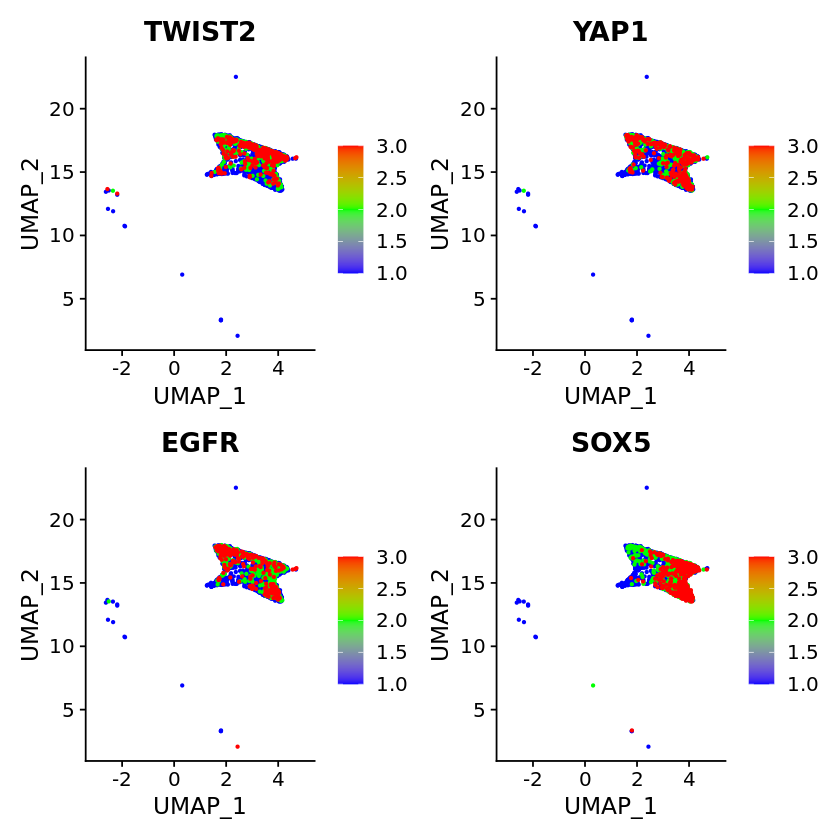

In [92]:
#FeaturePlot(seurat_c14, features= c("COL1A1", "DLC1", "COL1A2", "SLIT3", "COL3A1"))
#You can avoid quantile scaling by setting min.cutoff to 0 (instead of 'q10' or similar)
#Quantile-quantile scaling. 
#Calculate gene-specific contrast levels based on quantiles of non-zero expression. 
#Particularly useful when plotting multiple markers
#Look at: https://satijalab.org/seurat/v2.4/visualization_vignette.html

#FeaturePlot(seurat_c14, features= c("TWIST2", "YAP1", "EGFR", "SOX5"), order=TRUE, cols = c("blue", "green", "red"), min.cutoff= 'q1') 
FeaturePlot(seurat_c14, features= c("TWIST2", "YAP1", "EGFR", "SOX5"), order=TRUE, cols = c("blue", "green", "red"), min.cutoff= "q10", max.cutoff = "q95") 

In [42]:
#FeaturePlot(seurat_c14, features= c("TWIST2", "YAP1", "EGFR", "SOX5"), order=TRUE, cols = c("blue", "green", "red"), min.cutoff= "q10", max.cutoff = "q95") 

In [117]:
pdf("SMC_genes_Sub2_28012021.pdf", w=9, h=15, paper= "special")


FeaturePlot(seurat_c14, features= c("LIMCH1", "DLC1", "GUCY1A2", "RGS5", "CPM",
                                   "ADARB2", "MEF2C", "SLIT3", "EGFLAM", "MYO1B",
                                   "ITGA1", "NOTCH3", "PDGFRB", "ZEB2", "NCKAP5",
                                   "COL18A1", "JAG1", "ABCC9"), order=TRUE, cols = c("blue", "green", "red"), ncol=3, min.cutoff=0) 

dev.off()

png 
  2

In [118]:
pdf("dFibroblast_genes_Sub5_28012021.pdf", w=9, h=15, paper= "special")


FeaturePlot(seurat_c14, features= c("COL1A2", "COL1A1", "ACTA2", "SLIT2", "COL3A1", "PDLIM3", 
                                   "COL6A1", "COL6A2", "SPARC", "ENAH", "SYTL2",
                                   "TNC", "TWIST1", "EDIL3", "FN1", "FRY", "MYH11", 
                                   "MEIS2", "MYH9", "THBS2"), order=TRUE, cols = c("blue", "green", "red"), ncol=3, min.cutoff=0) 

dev.off()

png 
  2

In [95]:
#FeaturePlot(seurat_c14, features= c("TWIST2", "YAP1", "EGFR", "SOX5"), order=TRUE, cols = c("blue", "green", "red"), min.cutoff= 0, max.cutoff = 10) 

In [99]:
#FeaturePlot(seurat_c14, features= c("COL1A1", "COL1A2", "SLIT3", "COL3A1"), order=TRUE, cols = c("blue", "green", "red"), min.cutoff= "q10", max.cutoff = "q95") 

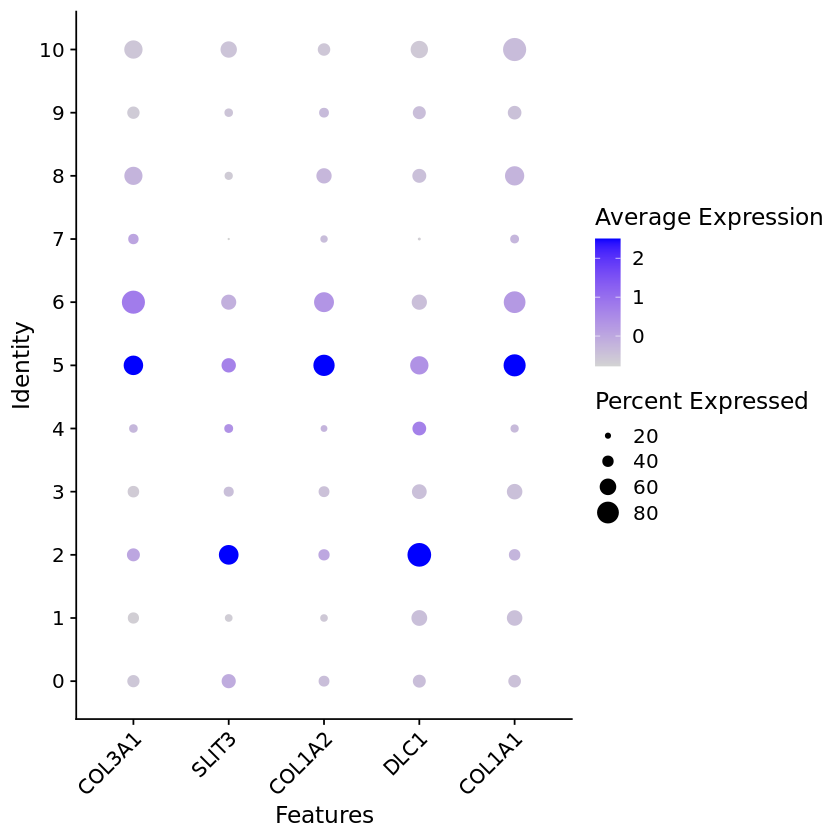

In [29]:
#Validate the clusters with some classical markers:
DefaultAssay(seurat_c14) <- "RNA"

DotPlot(seurat_c14, features= c("COL1A1", "DLC1", "COL1A2", "SLIT3", "COL3A1"))+ RotatedAxis()

In [16]:
#dStromaCells = merge 1, 2, 3, 5, 6, 9
#Then, dSmoothMuscle = merge 0, 4, 7, 8

In [17]:
seurat_c14 <- RenameIdents(object = seurat_c14,  '0' = 'dSMC_14', '1' = 'dStromal_14', '2' = 'dStromal_14', '3'= 'dStromal_14', 
                           '4'= 'dSMC_14', '5'= 'dStromal_14', '6'= 'dStromal_14', 
                           '7'= 'dSMC_14', '8'= 'dSMC_14', '9'= 'dStromal_14')

seurat_c14 <- StashIdent(object = seurat_c14, save.name = "C14_subclusters")

Idents(object= seurat_c14) <- 'C14_subclusters'

table(Idents(seurat_c14)) 

With Seurat 3.X, stashing identity classes can be accomplished with the following:
seurat_c14[["C14_subclusters"]] <- Idents(object = seurat_c14)




    dSMC_14 dStromal_14 
        719        1240 

In [18]:
colnames(seurat_c14@meta.data)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "stim"                   "percent.mt"             "S.Score"               
 [7] "G2M.Score"              "Phase"                  "old.ident"             
[10] "integrated_snn_res.0.5" "seurat_clusters"        "group"                 
[13] "disease"                "time"                   "tissue"                
[16] "tissue_time"            "integrated_snn_res.1"   "integrated_snn_res.2"  
[19] "integrated_snn_res.3"   "cell_type"              "RNA_snn_res.0.8"       
[22] "Merged_cell_type_PC35"  "cell_type_merged"       "nCount_integrated"     
[25] "nFeature_integrated"    "C14_subclusters"

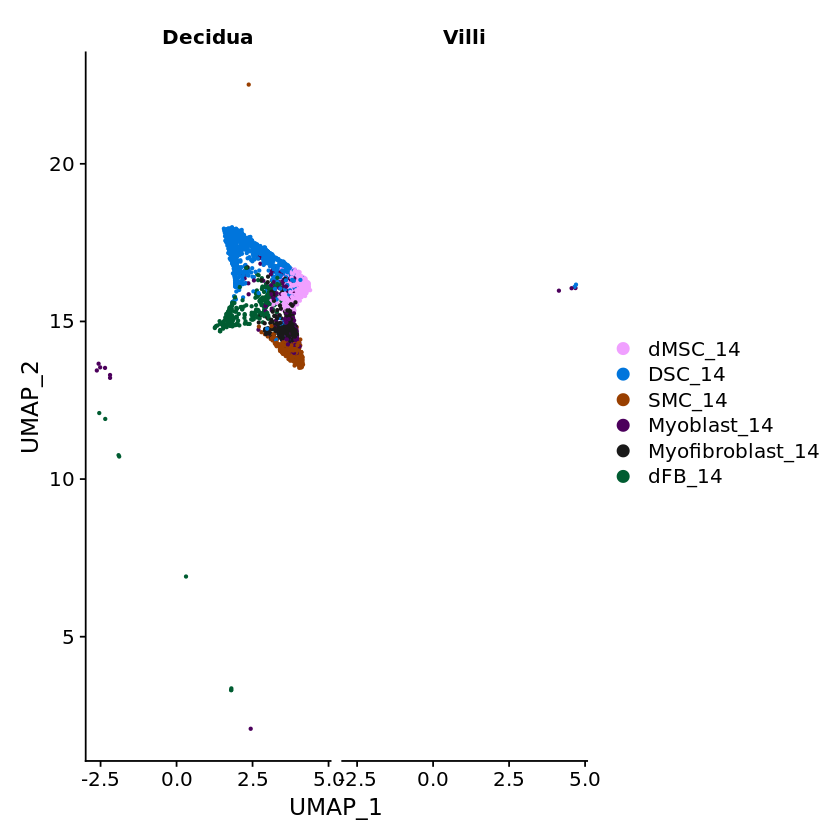

In [31]:
UMAPPlot(object= seurat_c14, cols= "alphabet", split.by= "tissue")

In [18]:
#Latest annotations: from trajectory analysis inputs. 
#Cl-0 or louvain-0 is clearly dMSC (progenitors)

seurat_c14 <- RenameIdents(object = seurat_c14,  '0' = 'dMSC_14', '1' = 'DSC_14', '2' = 'SMC_14', '3'= 'DSC_14', 
                           '4'= 'Myoblast_14', '5'= 'Myofibroblast_14', '6'= 'dFB_14', '7'= 'dFB_14', '8'= 'DSC_14', '9'= 'DSC_14',
                          '10'= 'dFB_14')

seurat_c14 <- StashIdent(object = seurat_c14, save.name = "C14_subclusters")

Idents(object= seurat_c14) <- 'C14_subclusters'

table(Idents(seurat_c14)) 

With Seurat 3.X, stashing identity classes can be accomplished with the following:
seurat_c14[["C14_subclusters"]] <- Idents(object = seurat_c14)




         dMSC_14           DSC_14           SMC_14      Myoblast_14 
             518             1045              430              292 
Myofibroblast_14           dFB_14 
             264              365 

In [21]:
pdf("DSC_subcluster_final_0102021.pdf", w=5, h=5, paper= "special")

UMAPPlot(object= seurat_c14, cols= "polychrome") #Multi.L

dev.off() 

png 
  2

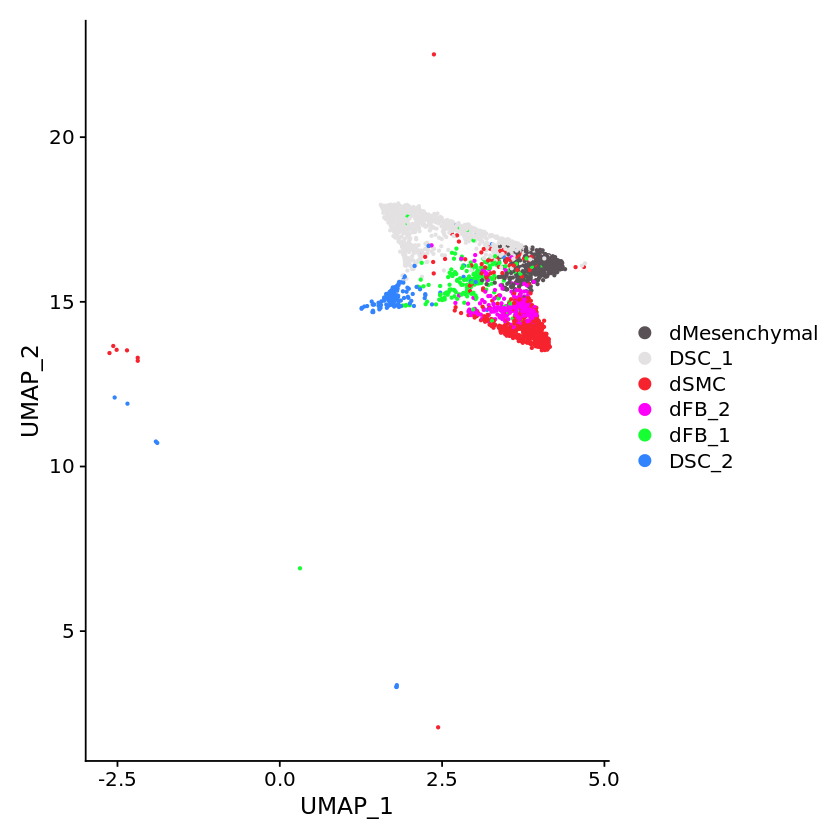

In [33]:
#Replot:
UMAPPlot(object= seurat_c14, cols= "polychrome") #Multi.L

In [25]:
#Find Markers: LR
DefaultAssay(seurat_c14) <- "RNA"

myofb.markers= FindMarkers(seurat_c14, ident.1= "Myoblast_14", only.pos = TRUE, min.pct = 0.05, logfc.threshold = 0.25, test.use= "LR")

head(myofb.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PCSK5,4.514482e-19,1.2449407,0.387,0.273,1.178957e-14
HBB,1.391547e-17,1.0478047,0.295,0.174,3.634025e-13
FOXO3,1.501642e-12,0.8728693,0.315,0.227,3.921539e-08
SETBP1,2.285708e-11,0.7634171,0.356,0.262,5.969126e-07
CPM,9.872497e-10,0.7929397,0.257,0.151,2.578203e-05
HBA2,8.508968e-09,0.8101680,0.178,0.116,2.222117e-04


In [24]:
#Find Markers:
DefaultAssay(seurat_c14) <- "RNA"

myofb.markers= FindMarkers(seurat_c14, ident.1= "Myofibroblast_14", only.pos = TRUE, min.pct = 0.05, logfc.threshold = 0.25, test.use= "negbinom")

head(myofb.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
COL1A1,2.646543e-110,1.8176298,0.811,0.490,6.911448e-106
COL1A2,1.006828e-93,1.5677223,0.780,0.366,2.629331e-89
FN1,1.651054e-93,1.4173194,0.667,0.292,4.311726e-89
EDIL3,2.747979e-68,0.5327789,0.379,0.040,7.176348e-64
COL3A1,3.534066e-65,1.3797456,0.712,0.448,9.229212e-61
COL6A1,1.506900e-58,0.8957445,0.545,0.281,3.935268e-54


In [26]:
#Find Markers:
DefaultAssay(seurat_c14) <- "RNA"

myofb.markers= FindMarkers(seurat_c14, ident.1= "Myoblast_14", ident.2= "Myofibroblast_14", only.pos = TRUE, min.pct = 0.05, logfc.threshold = 0.25, test.use= "LR")

head(myofb.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CNTN4,1.743807e-05,0.7739227,0.312,0.201,0.4553951
CNR1,1.921851e-05,1.0065231,0.250,0.159,0.5018915
P2RY14,9.356056e-05,0.9131841,0.202,0.117,1.0000000
HBA2,1.505451e-04,0.8282813,0.178,0.095,1.0000000
HBB,3.097873e-04,0.7423156,0.295,0.216,1.0000000
ADAMTS9-AS2,7.356697e-04,0.6992217,0.425,0.383,1.0000000


In [30]:
#Find Markers:
DefaultAssay(seurat_c14) <- "RNA"

dsc.markers= FindMarkers(seurat_c14, ident.1= "dStromal_14", only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, test.use= "negbinom")

head(dsc.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SAT1,1.193197e-184,1.5564236,0.915,0.637,3.116033e-180
AC027288.3,1.061244e-120,1.1210401,0.791,0.427,2.771439e-116
SYT1,2.267457e-117,1.2270501,0.749,0.480,5.921464e-113
IGFBP1,4.119436e-109,1.6369195,0.673,0.306,1.075791e-104
NEAT1,2.153299e-106,0.9562992,0.916,0.953,5.623340e-102
TIMP3,1.535530e-104,1.3538504,0.906,0.659,4.010037e-100


In [31]:
write.csv(dsc.markers, file= "C14_DSC_markers_28012021_NegBinom.csv")

#ROC: 
dsc.markers.roc = FindMarkers(seurat_c14, ident.1= "dStromal_14", only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, test.use= "roc")

head(dsc.markers.roc)

write.csv(dsc.markers.roc, file= "C14_DSC_markers_28012021_ROC.csv")

,myAUC,avg_diff,power,pct.1,pct.2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SAT1,0.838,1.510856,0.676,0.915,0.637
TIMP3,0.800,1.566035,0.600,0.906,0.659
AC027288.3,0.763,1.154489,0.526,0.791,0.427
DCN,0.749,0.972507,0.498,0.935,0.776
THSD7A,0.732,1.137111,0.464,0.760,0.460
FERMT2,0.731,1.099939,0.462,0.707,0.374


In [32]:
smc.markers= FindMarkers(seurat_c14, ident.1= "dSMC_14", only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, test.use= "negbinom")

#head(smc.markers)

write.csv(smc.markers, file= "C14_SMC_markers_28012021_NegBinom.csv")

#ROC method:
smc.markers.roc = FindMarkers(seurat_c14, ident.1= "dSMC_14", only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, test.use= "roc")

head(smc.markers.roc)

write.csv(smc.markers.roc, file= "C14_SMC_markers_28012021_ROC.csv")

,myAUC,avg_diff,power,pct.1,pct.2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LINC02296,0.782,1.6408074,0.564,0.747,0.323
SOX5,0.771,1.0587621,0.542,0.846,0.556
LHFPL3,0.766,1.4694713,0.532,0.670,0.181
MIR99AHG,0.751,0.8004131,0.502,0.904,0.679
RORA,0.746,0.7387833,0.492,0.954,0.777
ULK4,0.740,0.8051844,0.480,0.911,0.680


#FeaturePlot(seurat_c14, features= c("TWIST2", "YAP1", "EGFR", "SOX5"), order= TRUE)

#FeaturePlot(seurat_c14, features= c("IGFBP1", "DKK1", "FOXO1", "ZEB1"), order= TRUE)

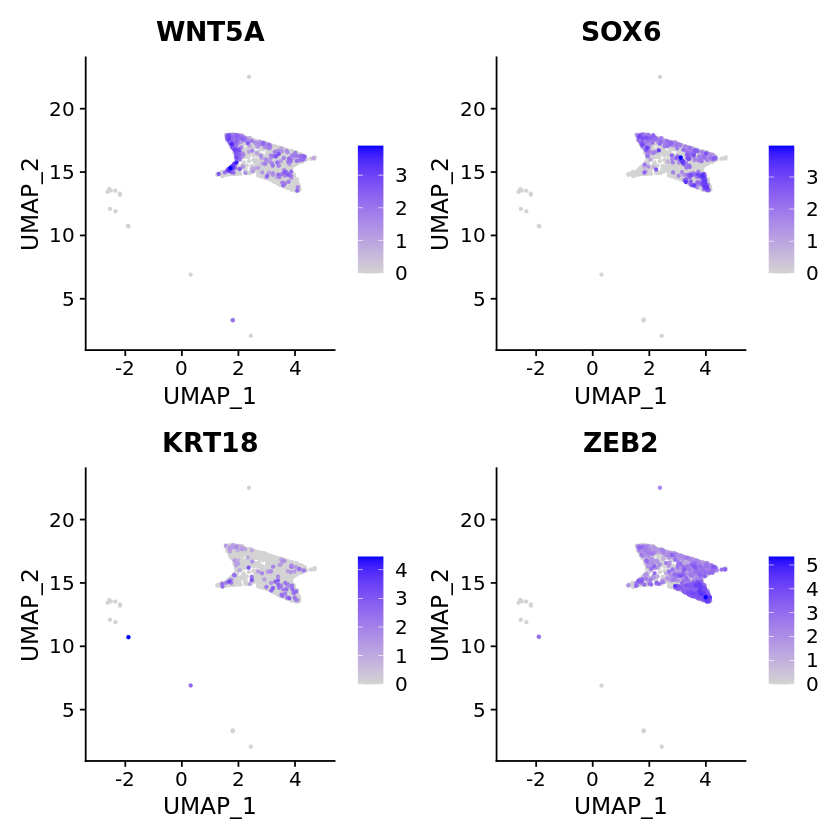

In [41]:
FeaturePlot(seurat_c14, features= c("WNT5A", "SOX6", "KRT18", "ZEB2"), order= TRUE)

In [42]:
#Transfer subcluster labels to the original UMAP: 

#Generate a new column called sub_cluster in the metadata in the original data
data$sub_cluster <- as.character(Idents(data))
c14_cells= rownames(seurat_c14@meta.data) #to get cells names from seurat_c14 i.e., DSC & SMC annot. 


#Change the information of cells containing sub-cluster information:

data$sub_cluster[Cells(seurat_c14)] <- paste("c14_cells",Idents(seurat_c14))

In [43]:
Idents(object= data) <- 'sub_cluster'

table(Idents(data)) 


                vSCT_1                   vVCT                    vMC 
                 38908                   4561                    693 
              vClus_15        vHoffbauer_cell          vErythroblast 
                  1730                   2246                   1167 
             vVCT_prol                   vEVT                 vSCT_2 
                  1193                    676                   4437 
       vDendritic_cell      vTrophoblast_stem                 vTcell 
                   720                    697                   1175 
          vVascular_EC        Unclassified_35            vFibroblast 
                  1105                     64                    811 
                vBcell         c14_cells dSMC       dEpithelial_cell 
                   115                    722                   7065 
          dVascular_EC        c14_cells DSC_1          dLymphatic_EC 
                  1660                   1004                   2797 
                dTc

In [25]:
pdf("UMAP_subcluster_v1_0102021.pdf", w=12, h=9, paper= "special")

UMAPPlot(object= data, cols= "polychrome") #Multi.L

dev.off() 

Warning message in DiscretePalette(length(unique(data[[col.by]])), palette = cols):
“Not enough colours in specified palette”


png 
  2

In [26]:
require(scales)

Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [ ]:
#Create vector with levels of object@ident
#identities <- levels(Idents(object= data))

#Create vector of default ggplot2 colors
#my_color_palette <- hue_pal()(length(identities))

#Plot the tSNE plot with the default ggplot2 colors
#UMAPPlot(object = data, do.return = T) + 
  #scale_color_manual(values = my_color_palette)

In [33]:
DefaultAssay(data) <- "RNA"

dFB.markers= FindMarkers(data, ident.1= "dFB_21", only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, test.use= "negbinom")

head(dFB.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLC6A1-AS1,0.000000e+00,0.4734658,0.275,0.001,0.000000e+00
COL18A1,4.623499e-224,0.6870230,0.488,0.033,1.207427e-219
DLC1,2.034106e-182,1.1278427,0.714,0.116,5.312067e-178
PDGFRB,1.492279e-167,0.6576766,0.526,0.018,3.897086e-163
DPY19L2,9.512810e-165,0.3528244,0.260,0.041,2.484270e-160
PDE1A,4.892526e-158,0.3661298,0.313,0.027,1.277683e-153


In [34]:
write.csv(dFB.markers, file= "C21_dFB_markers_28012021_NegBinom.csv")


#FeaturePlot(data, features= c("WNT5A", "SOX6", "KRT18", "ZEB2"), order= TRUE)

In [53]:
#FeaturePlot(data, features= c("WNT5A", "SOX6", "SOX5"), order= TRUE)

In [52]:
#FeaturePlot(data, features= c("ZEB1", "TWIST2", "KRT5", "ZEB2"), order= TRUE)

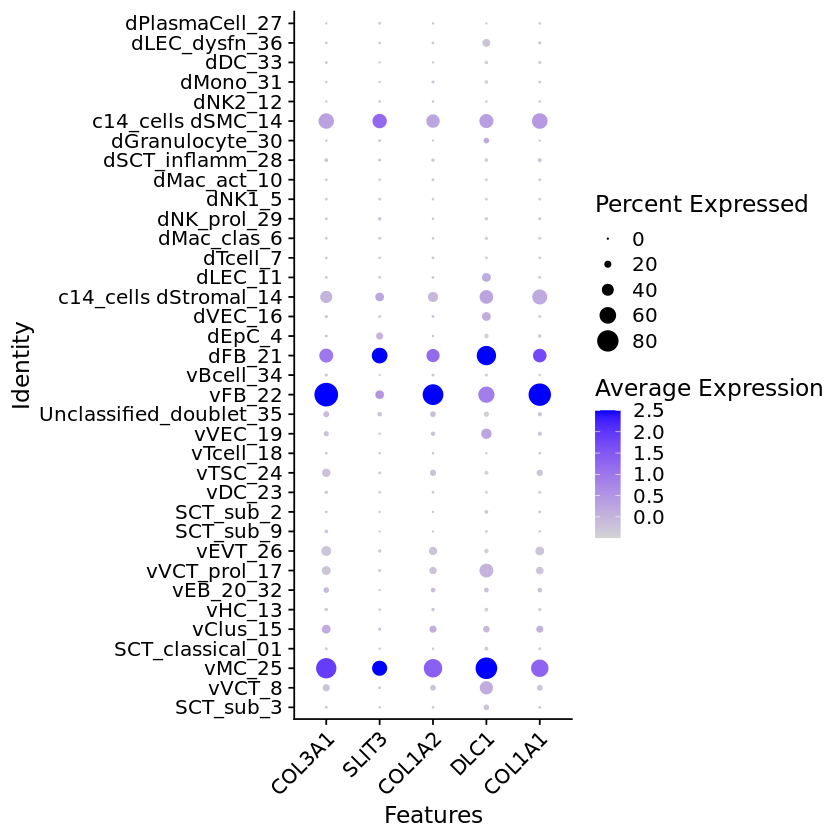

In [56]:
DotPlot(data, features= c("COL1A1", "DLC1", "COL1A2", "SLIT3", "COL3A1"))+ RotatedAxis()

Warning message in FetchData(object = object, vars = features):
“The following requested variables were not found: RSG5”


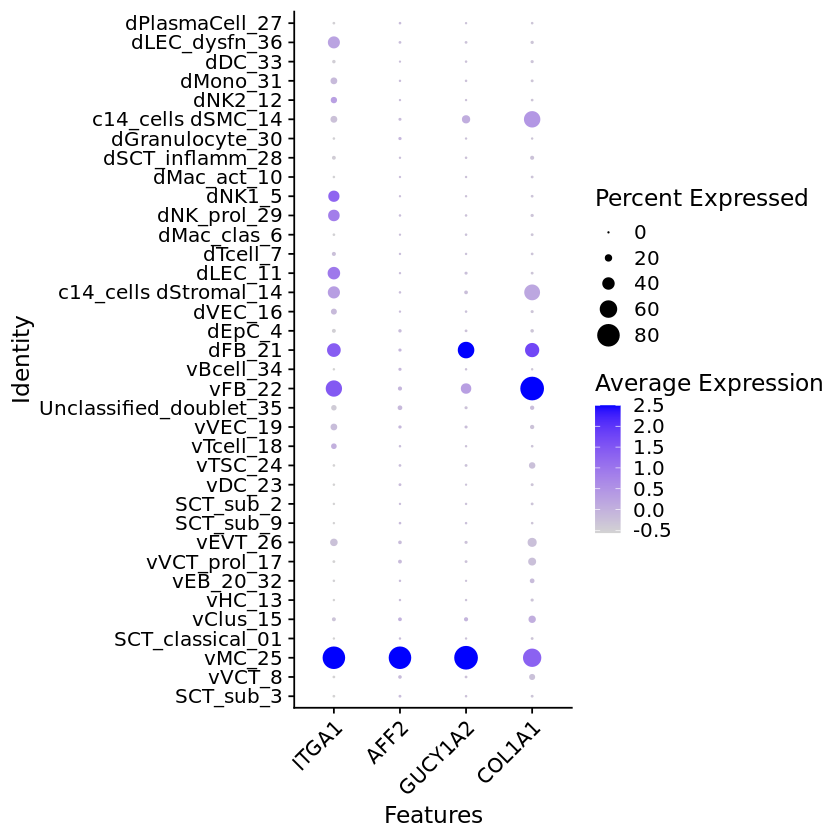

In [60]:
DotPlot(data, features= c("COL1A1", "GUCY1A2", "AFF2", "ITGA1", "RSG5"))+ RotatedAxis()

In [65]:
pdf("Fibroblast_Collagen_genes_28012021.pdf", h=10, w=9, paper= "special")

DotPlot(data, features= c("COL1A1", "COL6A2", "COL5A2", "COL6A1", "COL3A1", "COL4A2", 
                          "COL6A3", "COL4A1", "SPARC", "COL18A1", "PDGFRB", 
                          "DLC1", "COL1A2", "SLIT3", 
                         "GUCY1A2", "AFF2", "ITGA1"))+ RotatedAxis()

dev.off()

png 
  2

The plots for all features and conditions are scaled to the maximum expression value for the feature with the highest overall expression. 

In [50]:
data

An object of class Seurat 
30426 features across 101031 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

#DefaultAssay(data) <- "RNA"

#FeaturePlot(data, features= "CGA", order= TRUE, slot= "data", cols = c("blue", "lightyellow", "green", "red"))

#FeaturePlot(data, features= "MEOX2", order= TRUE, slot= "data", cols = c("blue", "lightyellow", "green", "red"))

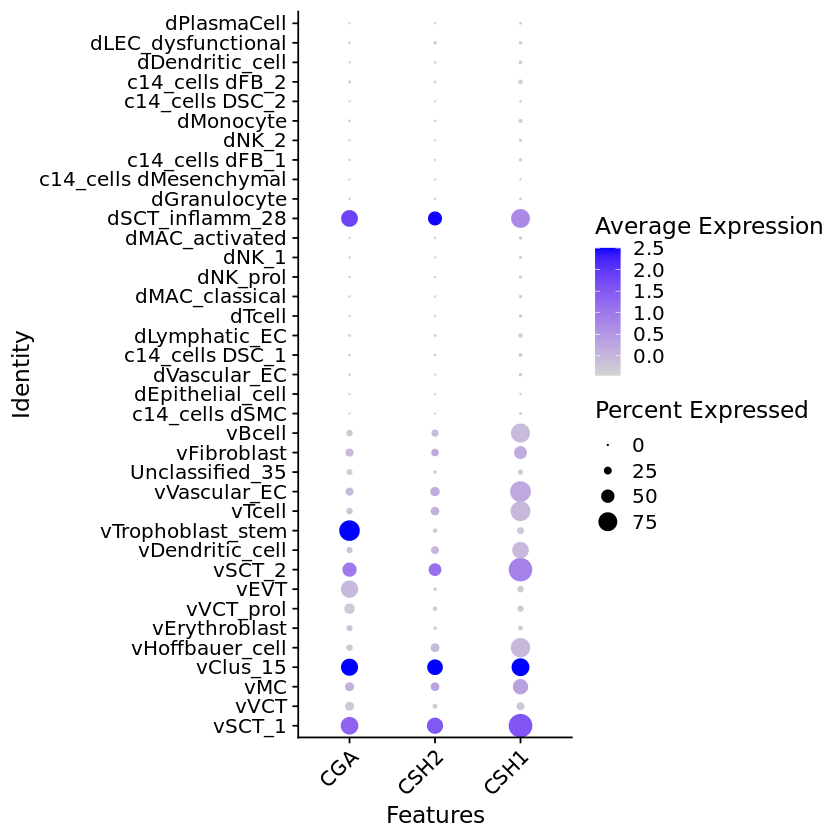

In [62]:
DotPlot(data, features= c("CSH1", "CSH2", "CGA"))+ RotatedAxis()

#FeaturePlot(data, features= "CSH1", order= TRUE, slot= "data", cols = c("blue", "lightyellow", "green", "red"))

#FeaturePlot(data, features= "GNLY", order= TRUE, slot= "data", cols = c("lightblue", "green", "red"))

In [57]:
#FeaturePlot(data, features= "GNLY", order= TRUE, slot= "data", cols = c("lightblue", "green", "red"), min.cutoff= 'q3')

In [58]:
#FeaturePlot(data, features= "MEOX2", order= TRUE, slot= "data", cols = c("lightblue", "green", "red"), min.cutoff= 'q5')

In [67]:
#FeaturePlot(data, features= c("MEOX2", "GNLY", "COL1A1"), order= TRUE, slot= "data", cols = c("lightblue", "green", "red"), min.cutoff= 'q5')

In [32]:
#DefaultAssay(data) <- "RNA"

#FeaturePlot(data, features= "GNLY", cols = c("blue", "green", "red"), order= TRUE)

In [29]:
data

An object of class Seurat 
30426 features across 101031 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [44]:
Idents(object= data) <- 'sub_cluster'

table(Idents(data)) 


                vSCT_1                   vVCT                    vMC 
                 38908                   4561                    693 
              vClus_15        vHoffbauer_cell          vErythroblast 
                  1730                   2246                   1167 
             vVCT_prol                   vEVT                 vSCT_2 
                  1193                    676                   4437 
       vDendritic_cell      vTrophoblast_stem                 vTcell 
                   720                    697                   1175 
          vVascular_EC        Unclassified_35            vFibroblast 
                  1105                     64                    811 
                vBcell         c14_cells dSMC       dEpithelial_cell 
                   115                    722                   7065 
          dVascular_EC        c14_cells DSC_1          dLymphatic_EC 
                  1660                   1004                   2797 
                dTc

In [45]:
#Subset vSCTjuvenile (a part of the initial cluster 15 louvain): 

subset = "vClus_15"

seurat_c15 = subset(data, idents = subset) 

#seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

seurat_c15

table(Idents(seurat_c15))

DefaultAssay(seurat_c15) <- "RNA"

#Find the highly variable features for C15: 
seurat_c15 <- FindVariableFeatures(seurat_c15, selection.method = "vst")

hvg_features_msc = VariableFeatures(object = seurat_c15)

head(hvg_features_msc)

An object of class Seurat 
30426 features across 1730 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap


vClus_15 
    1730 

[1] "HBA1"       "TAC3"       "HBA2"       "AC004704.1" "FN1"       
[6] "SERPINE2"

In [46]:
#Change to integrated: 

DefaultAssay(seurat_c15) <- "integrated"

#Rescale & recompute PCA prior to clustering: 
seurat_c15 <- ScaleData(seurat_c15)
seurat_c15 <- RunPCA(seurat_c15, verbose = FALSE, features= hvg_features_msc)

Centering and scaling data matrix



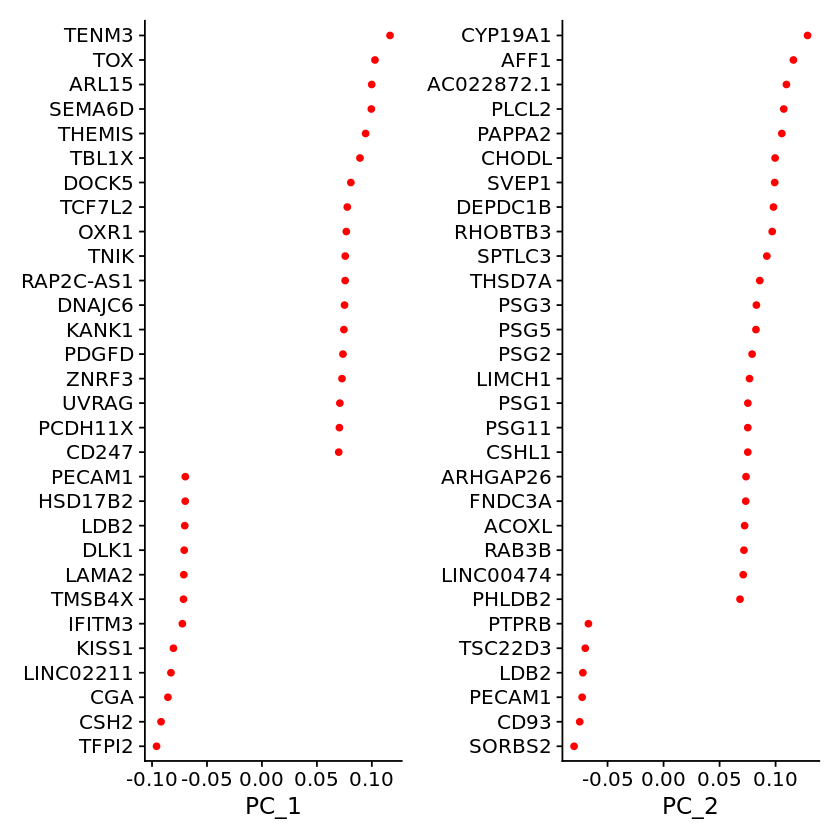

In [47]:
VizDimLoadings(seurat_c15, dims= 1:2, col= 'red')

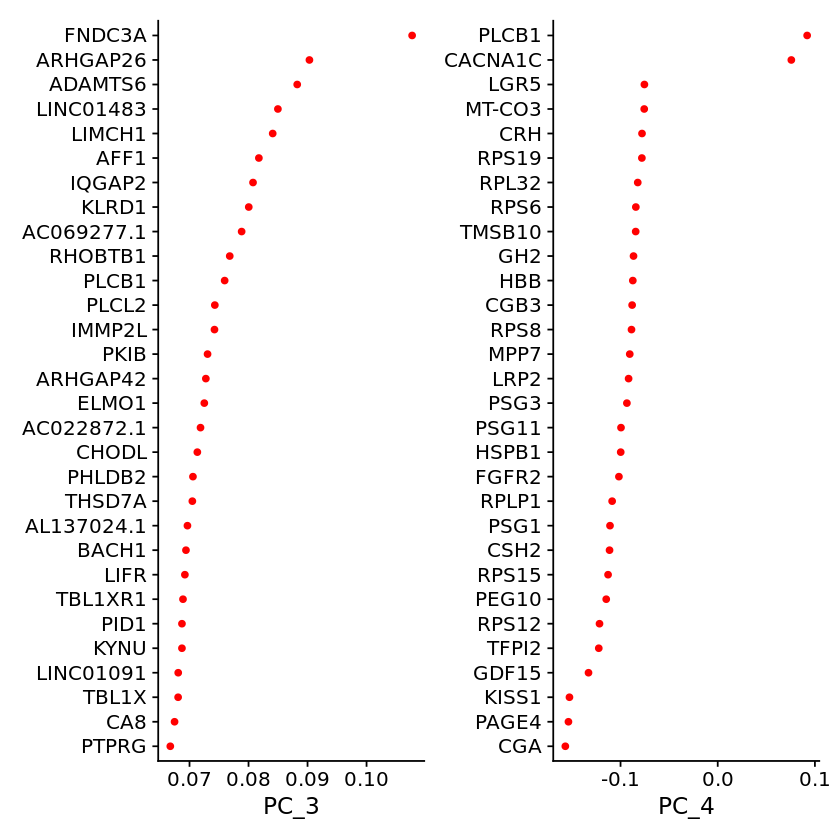

In [48]:
VizDimLoadings(seurat_c15, dims= 3:4, col= 'red')

In [65]:
#Compute nearest neighbor graph for C15 followed my calculation of Louvain clusters: 
seurat_c15 <- FindNeighbors(seurat_c15, dims = 1:10, force.recalc = T)

seurat_c15 <- FindClusters(seurat_c15, resolution = 0.5, algorithm=2) #algorithm2 is multilevel Louvain. 


Idents(object= seurat_c15) <- 'integrated_snn_res.0.5'

table(Idents(seurat_c15))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1730
Number of edges: 56568

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.8323
Number of communities: 7
Elapsed time: 0 seconds



  0   1   2   3   4   5   6 
491 408 326 259 141  61  44 

In [66]:
#Compile & set as idents: 

#Rename the cluster idents a/c to the cell type names (as reflected by marker analysis): 
seurat_c15 <- RenameIdents(object = seurat_c15,  '0' = 'vSCT_15.3', '1' = 'vSCT_15.3', '2' = 'vVCT_15.1', '3'= 'vMSC_15.2', 
                           '4'= 'vVCT_15.1', '5'= 'vVCT_15.1', '6'= 'vVCT_15.1')


seurat_c15 <- StashIdent(object = seurat_c15, save.name = "C15_subclusters")

Idents(object= seurat_c15) <- 'C15_subclusters'

table(Idents(seurat_c15)) 

With Seurat 3.X, stashing identity classes can be accomplished with the following:
seurat_c15[["C15_subclusters"]] <- Idents(object = seurat_c15)




vSCT_15.3 vVCT_15.1 vMSC_15.2 
      899       572       259 

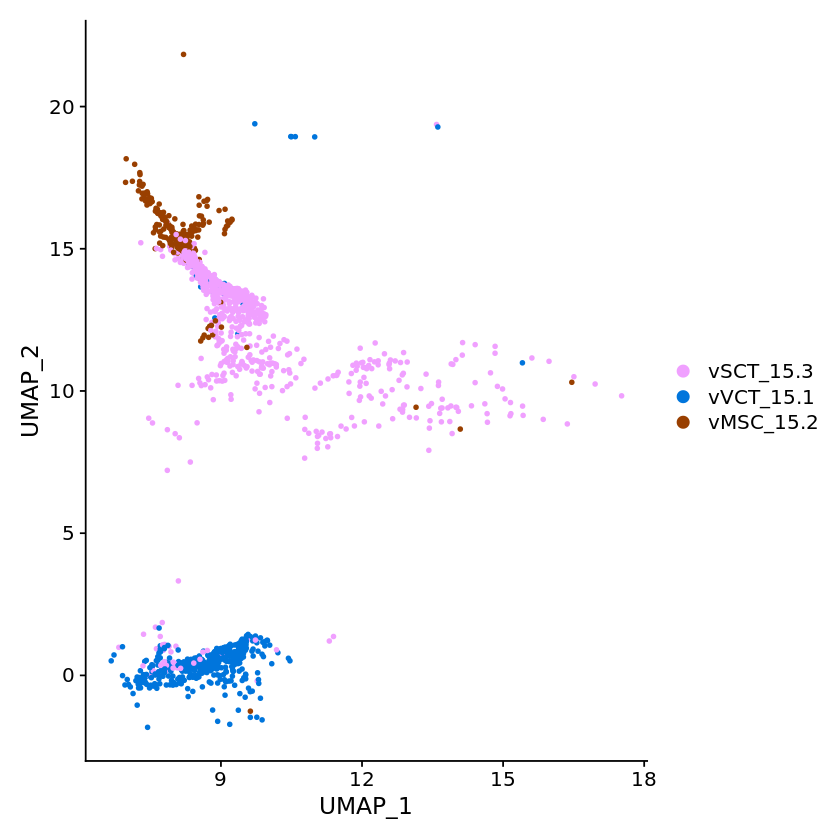

In [67]:
UMAPPlot(object= seurat_c15, cols= "alphabet")

In [45]:
#FeaturePlot(seurat_c15, features = c("VIM", "DES", "APNEP", "BMP2"), ncol=2, cols = c("white", "red"))

In [68]:
#Transfer subcluster labels to the original UMAP: 

#Generate a new column called sub_cluster in the metadata in the original data
data$sub_cluster_final <- as.character(Idents(data))

c15_cells= rownames(seurat_c15@meta.data) #to get cells names from seurat_c15 i.e., MSC & VCT/SCT annot. 


#Change the information of cells containing sub-cluster information:
data$sub_cluster_final[Cells(seurat_c15)] <- paste("c15_cells",Idents(seurat_c15))

In [69]:
Idents(object= data) <- 'sub_cluster_final'

table(Idents(data)) 


                vSCT_1                   vVCT                    vMC 
                 38908                   4561                    693 
   c15_cells vVCT_15.1        vHoffbauer_cell          vErythroblast 
                   572                   2246                   1167 
             vVCT_prol                   vEVT                 vSCT_2 
                  1193                    676                   4437 
       vDendritic_cell      vTrophoblast_stem                 vTcell 
                   720                    697                   1175 
          vVascular_EC        Unclassified_35    c15_cells vSCT_15.3 
                  1105                     64                    899 
           vFibroblast    c15_cells vMSC_15.2                 vBcell 
                   811                    259                    115 
        c14_cells dSMC       dEpithelial_cell           dVascular_EC 
                   722                   7065                   1660 
       c14_cells DS

In [70]:
Idents(data) <- factor(x = Idents(data), levels = sort(levels(data)))

table(Idents(data)) 


       c14_cells dFB_1        c14_cells dFB_2 c14_cells dMesenchymal 
                   214                    264                    518 
       c14_cells DSC_1        c14_cells DSC_2         c14_cells dSMC 
                  1004                    192                    722 
   c15_cells vMSC_15.2    c15_cells vSCT_15.3    c15_cells vVCT_15.1 
                   259                    899                    572 
       dDendritic_cell       dEpithelial_cell           dGranulocyte 
                   177                   7065                    357 
    dLEC_dysfunctional          dLymphatic_EC         dMAC_activated 
                    52                   2797                   2985 
        dMAC_classical              dMonocyte                  dNK_1 
                  6591                    248                   6631 
                 dNK_2               dNK_prol            dPlasmaCell 
                  2761                    462                    551 
       dSCT_inflamm

In [71]:
#Merge vVCT_8 with c15_cells vVCT_15.1 (they all belong to "vVCT" category)
#vMSC_15.2 were later renamed to vtropho_15/vSCTjuv & mainly has late/PE cells. 

data <- RenameIdents(object = data,  'c14_cells dFB_1' = 'dFB_1', 'c14_cells dFB_2' = 'dFB_2', 'c14_cells dMesenchymal' = 'dMesenchymal', 
                     'c14_cells DSC_1'= 'DSC_1', 'c14_cells DSC_2'= 'DSC_2', "c14_cells dSMC"= "dSMC", 
                     'c15_cells vMSC_15.2'= 'vMSC_15.2', 
                     'c15_cells vSCT_15.3'= 'vSCT_15.3', 'c15_cells vVCT_15.1'= 'vVCT_8')


data <- StashIdent(object = data, save.name = "cell_type_semifinal")

Idents(object= data) <- 'cell_type_semifinal'

table(Idents(data)) 

With Seurat 3.X, stashing identity classes can be accomplished with the following:
data[["cell_type_semifinal"]] <- Idents(object = data)




             dFB_1              dFB_2       dMesenchymal              DSC_1 
               214                264                518               1004 
             DSC_2               dSMC          vMSC_15.2          vSCT_15.3 
               192                722                259                899 
            vVCT_8    dDendritic_cell   dEpithelial_cell       dGranulocyte 
               572                177               7065                357 
dLEC_dysfunctional      dLymphatic_EC     dMAC_activated     dMAC_classical 
                52               2797               2985               6591 
         dMonocyte              dNK_1              dNK_2           dNK_prol 
               248               6631               2761                462 
       dPlasmaCell    dSCT_inflamm_28             dTcell       dVascular_EC 
               551                539               4943               1660 
   Unclassified_35             vBcell    vDendritic_cell      vErythroblast

In [113]:
#Save the latest meta data: after incorporating C28 based dSCT & dEVT
new_meta= as.data.frame(data@meta.data)

colnames(new_meta)

write.csv(new_meta, file= "./Merged_reclustering_final/Placenta_anno_semifinal_11022021.csv")

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "stim"                   "percent.mt"             "S.Score"               
 [7] "G2M.Score"              "Phase"                  "old.ident"             
[10] "integrated_snn_res.0.5" "seurat_clusters"        "group"                 
[13] "disease"                "time"                   "tissue"                
[16] "tissue_time"            "integrated_snn_res.1"   "integrated_snn_res.2"  
[19] "integrated_snn_res.3"   "cell_type"              "RNA_snn_res.0.8"       
[22] "Merged_cell_type_PC35"  "cell_type_merged"       "sub_cluster"           
[25] "sub_cluster_final"      "cell_type_semifinal"

#Custom color codes: 

cols= c("#9AC6C5", "#0A2472", "#F62DAE", "#FD96A9", "#C0C999", "#F87060", "#DEC1FF", "#5CC8FF", "1E441E", "31CB00", 
       "#C20114", "#63A375", "#D57A66", "#CA6680", "#713E5A", "#BF3100", "#D76A03", "#EC9F05", "#8EA604", "#998650", 
       "#E01A4F", "#7A9CC6", "#BDE4A7", "#156064", "#7D8CC4", "#EAC5D8", "#56CBF9", "#7C0B2B", "#FB4B4E", "#0B1D51", 
       "#646881", "#A14A76", "#048BA8", "#5C7AFF", "#63264A", "#662E9B", "#F9C80E", "#A799B7", "#EB5E28", "#372772")

In [124]:
cols= c("#9AC6C5", "#F62DAE", "#FD96A9", "#C0C999", "#F87060", "#DEC1FF", "#5CC8FF", "#bfff80", 
        "31CB00", "#C20114", "#63A375", "#D57A66", "#CA6680", "#713E5A", "#BF3100", "#D76A03",
        "#EC9F05", "#8EA604", "#998650", "#E01A4F", "#7A9CC6", "#BDE4A7", "#156064", "#7D8CC4", 
        "#EAC5D8", "#56CBF9", "#7C0B2B", "#FB4B4E", "#0B1D51", "#646881", "#A14A76", "#048BA8", "#5C7AFF", 
        "#63264A", "#662E9B", "#F9C80E", "#A799B7", "#EB5E28", "#372772")

In [123]:
table(Idents(data)) 


   dDendritic_cell   dEpithelial_cell               dEVT              dFB_1 
               177               7065                135                214 
             dFB_2       dGranulocyte dLEC_dysfunctional      dLymphatic_EC 
               264                357                 52               2797 
    dMAC_activated     dMAC_classical       dMesenchymal          dMonocyte 
              2985               6591                518                248 
             dNK_1              dNK_2           dNK_prol        dPlasmaCell 
              6631               2761                462                551 
             DSC_1              DSC_2               dSCT               dSMC 
              1004                192                404                722 
            dTcell       dVascular_EC    Unclassified_35             vBcell 
              4943               1660                 64                115 
   vDendritic_cell      vErythroblast               vEVT        vFibroblast

In [128]:
#UMAPPlot(object = data, cols= cols, label= TRUE, label.size = 2.5)

In [126]:
pdf("./Merged_reclustering_final/UMAP_merged_ver01_final_0102021.pdf", w=15, h=11, paper= "special")

UMAPPlot(object = data, cols= cols, label= TRUE, label.size = 2.5) #Updated clustering. 

dev.off()

png 
  2

In [127]:
pdf("./Merged_reclustering_final/UMAP_merged_ver02_final.pdf", w=15, h=11, paper= "special")

UMAPPlot(object = data, cols= cols) #Updated clustering. 

dev.off()

png 
  2

In [105]:
#table(Idents(data))

In [80]:
data

An object of class Seurat 
30426 features across 101031 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [79]:
DefaultAssay(object= data) <- "integrated"

In [81]:
#Subcluster C28: cluster deported synctitiotrophoblasts (DSCT) & dEVT(s): 
subset = "dSCT_inflamm_28" 

seurat_c28 = subset(data, idents = subset) 

#seurat_obj_receiver = SetIdent(seurat_obj_receiver, value = seurat_obj_receiver[["group"]])

seurat_c28

table(Idents(seurat_c28))

An object of class Seurat 
30426 features across 539 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap


dSCT_inflamm_28 
            539 

In [82]:
DefaultAssay(seurat_c28) <- "RNA"

#Recompute HVG for the subset: C28 is initial louvain cluster 28. 
seurat_c28 <- FindVariableFeatures(seurat_c28, selection.method = "vst")

seurat_c28@assays$RNA

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.4306”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  4.6166e-16”


Assay data with 26115 features for 539 cells
Top 10 variable features:
 FN1, SERPINE1, SEMA6D, NOTUM, MYCNUT, STAT4, ARL15, TENM3, TPM1,
AC023905.1 

In [83]:
hvg_features = VariableFeatures(object = seurat_c28)

head(hvg_features)

[1] "FN1"      "SERPINE1" "SEMA6D"   "NOTUM"    "MYCNUT"   "STAT4"

In [84]:
DefaultAssay(seurat_c28) <- "integrated"

#Rescale the data: 
seurat_c28 <- ScaleData(seurat_c28, features= hvg_features)

#Compute PCA: 
seurat_c28 <- RunPCA(seurat_c28, verbose = FALSE, features= hvg_features)

Centering and scaling data matrix



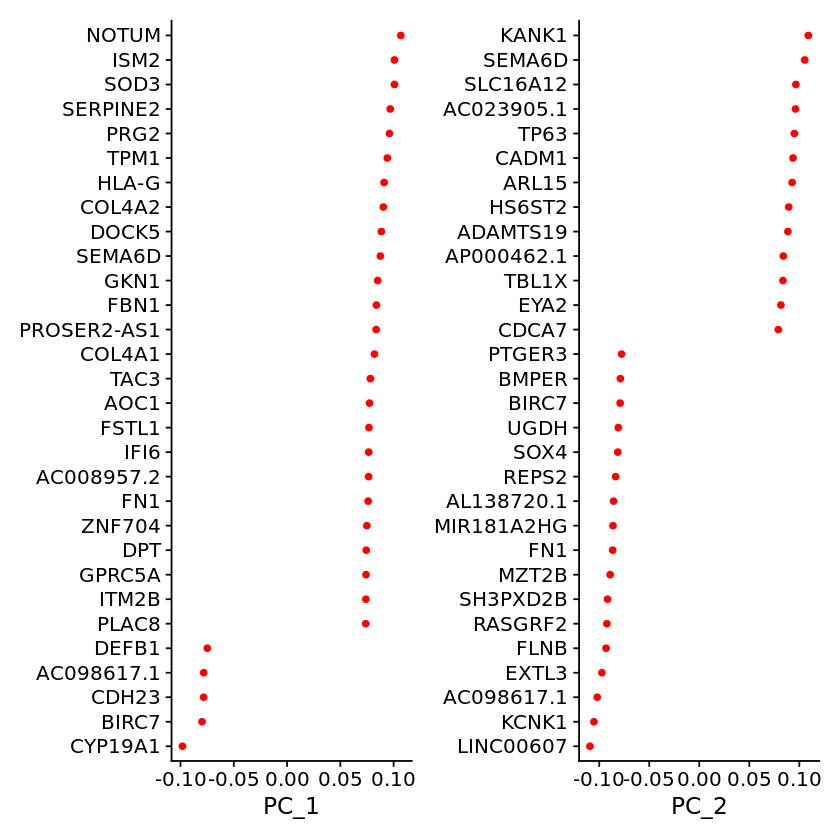

In [85]:
VizDimLoadings(object = seurat_c28, dims= 1:2, col= "red")

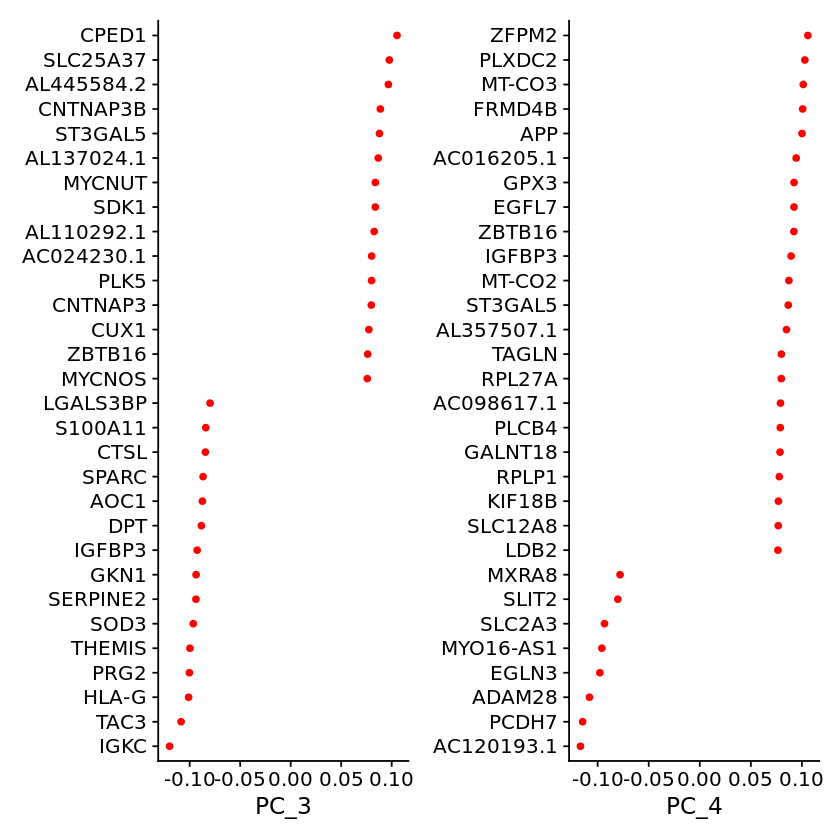

In [86]:
VizDimLoadings(object = seurat_c28, dims= 3:4, col= "red")

In [87]:
#Compute nearest shared neighbor graph: 
seurat_c28 <- FindNeighbors(seurat_c28, dims = 1:10, force.recalc = T)

seurat_c28 <- FindClusters(seurat_c28, resolution = 0.5, algorithm=2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 539
Number of edges: 17916

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.7663
Number of communities: 5
Elapsed time: 0 seconds


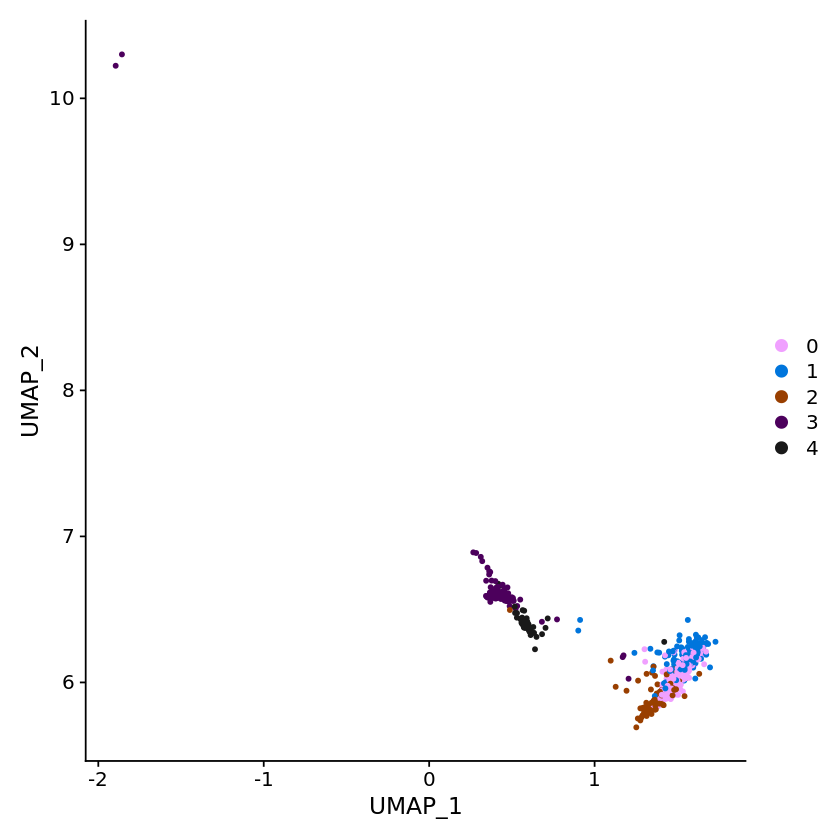

In [88]:
UMAPPlot(object= seurat_c28, cols= "alphabet")

In [89]:
#Set idents to the subclusters at resolution 0.5: 
Idents(object= seurat_c28) <- 'integrated_snn_res.0.5'

table(Idents(seurat_c28))


  0   1   2   3   4 
173 125 106  87  48 

In [91]:
#Compile & set as idents: 

#Map the subclusters to the phenotype: 0/1/2 are highly clustered & show strong SCT phenotype as opposed to 3/4 (EVT signature)
seurat_c28 <- RenameIdents(object = seurat_c28,  '0' = 'dSCT', '1' = 'dSCT', '2' = 'dSCT', '3'= 'dEVT', '4'= 'dEVT')


seurat_c28 <- StashIdent(object = seurat_c28, save.name = "C28_subclusters")

Idents(object= seurat_c28) <- 'C28_subclusters'

table(Idents(seurat_c28)) 

With Seurat 3.X, stashing identity classes can be accomplished with the following:
seurat_c28[["C28_subclusters"]] <- Idents(object = seurat_c28)




dSCT dEVT 
 404  135 

In [93]:
pdf("C28_subcluster_dEVT_1102021.pdf", w=4, h=4, paper= "special")

UMAPPlot(object= seurat_c28, cols= "alphabet")

dev.off()

png 
  2

In [94]:
DefaultAssay(seurat_c28) <- "RNA"

c28_markers_LR = FindAllMarkers(seurat_c28, only.pos = TRUE, min.pct = 0.05, logfc.threshold = 0.25, test.use= "LR")

head(c28_markers_LR)

Calculating cluster dSCT

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities nu

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
PLAC4,2.144470e-92,2.616415,0.973,0.141,5.600284e-88,dSCT,PLAC4
CYP19A1,5.936928e-85,2.355000,0.980,0.237,1.550429e-80,dSCT,CYP19A1
NEAT1,4.981726e-70,1.913259,0.995,0.867,1.300978e-65,dSCT,NEAT1
PSG4,3.274897e-62,2.499195,0.851,0.119,8.552394e-58,dSCT,PSG4
ADAM12,8.107073e-59,1.834831,0.985,0.600,2.117162e-54,dSCT,ADAM12
SPTLC3,3.131182e-58,2.091453,0.896,0.267,8.177081e-54,dSCT,SPTLC3


In [95]:
write.csv(c28_markers_LR, file= "Final_C28_markers_LogReg_1102021.csv")

In [98]:
filtered_LR_markers <- c28_markers_LR %>% group_by(cluster) %>% top_n(n = 40, wt = avg_logFC)

In [100]:
write.csv(filtered_LR_markers, file= "C28_filtered_LR_markers_1102021.csv")

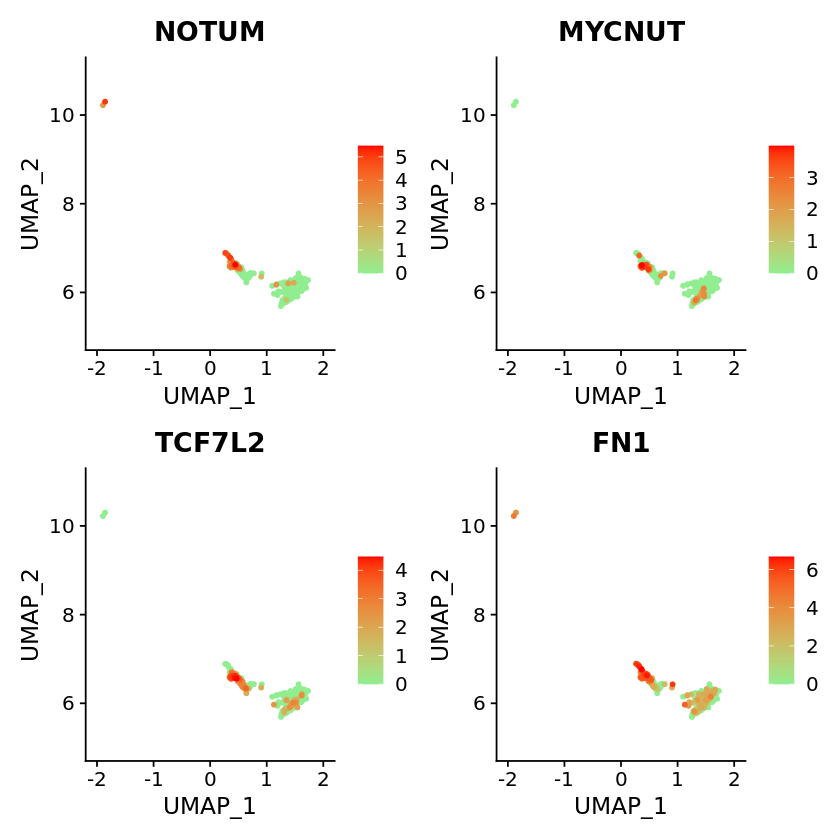

In [104]:
FeaturePlot(seurat_c28, features= c("NOTUM", "MYCNUT", "TCF7L2", "FN1"), order= TRUE, cols = c("lightgreen", "red"))

In [109]:
DefaultAssay(object= seurat_c28) <- "integrated"

seurat_c28

An object of class Seurat 
30426 features across 539 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [106]:
#Transfer subcluster labels from C28 (initial cluster 28) to the original UMAP: 

#Generate a new column called "sub_cluster_final" in the metadata in the original data to store the latest cluster annotations: 
data$sub_cluster_final <- as.character(Idents(data))

#to get cells names from seurat_c28 i.e., dSCT & dEVT.
c28_cells= rownames(seurat_c28@meta.data)  

#Change the information of cells containing sub-cluster information:
data$sub_cluster_final[Cells(seurat_c28)] <- paste("c28_cells",Idents(seurat_c28))

In [110]:
Idents(object= data) <- 'sub_cluster_final'

table(Idents(data)) 


            vSCT_1               vVCT                vMC             vVCT_8 
             38908               4561                693                572 
   vHoffbauer_cell      vErythroblast          vVCT_prol               vEVT 
              2246               1167               1193                676 
            vSCT_2    vDendritic_cell  vTrophoblast_stem             vTcell 
              4437                720                697               1175 
      vVascular_EC    Unclassified_35          vSCT_15.3        vFibroblast 
              1105                 64                899                811 
         vMSC_15.2             vBcell               dSMC   dEpithelial_cell 
               259                115                722               7065 
      dVascular_EC              DSC_1      dLymphatic_EC             dTcell 
              1660               1004               2797               4943 
    dMAC_classical           dNK_prol              dNK_1     dMAC_activated

In [111]:
#Rename the clusters wherever necessary: 

data <- RenameIdents(object = data,  'c28_cells dSCT' = 'dSCT', 'c28_cells dEVT' = 'dEVT', 'vVCT_8'= 'vVCT')

#Stash as "cell_type_semifinal"
data <- StashIdent(object = data, save.name = "cell_type_semifinal")
Idents(object= data) <- 'cell_type_semifinal'
table(Idents(data)) 

With Seurat 3.X, stashing identity classes can be accomplished with the following:
data[["cell_type_semifinal"]] <- Idents(object = data)




              dSCT               dEVT               vVCT             vSCT_1 
               404                135               5133              38908 
               vMC    vHoffbauer_cell      vErythroblast          vVCT_prol 
               693               2246               1167               1193 
              vEVT             vSCT_2    vDendritic_cell  vTrophoblast_stem 
               676               4437                720                697 
            vTcell       vVascular_EC    Unclassified_35          vSCT_15.3 
              1175               1105                 64                899 
       vFibroblast          vMSC_15.2             vBcell               dSMC 
               811                259                115                722 
  dEpithelial_cell       dVascular_EC              DSC_1      dLymphatic_EC 
              7065               1660               1004               2797 
            dTcell     dMAC_classical           dNK_prol              dNK_1

In [129]:
data

An object of class Seurat 
30426 features across 101031 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [112]:
Idents(data) <- factor(x = Idents(data), levels = sort(levels(data)))

table(Idents(data)) 


   dDendritic_cell   dEpithelial_cell               dEVT              dFB_1 
               177               7065                135                214 
             dFB_2       dGranulocyte dLEC_dysfunctional      dLymphatic_EC 
               264                357                 52               2797 
    dMAC_activated     dMAC_classical       dMesenchymal          dMonocyte 
              2985               6591                518                248 
             dNK_1              dNK_2           dNK_prol        dPlasmaCell 
              6631               2761                462                551 
             DSC_1              DSC_2               dSCT               dSMC 
              1004                192                404                722 
            dTcell       dVascular_EC    Unclassified_35             vBcell 
              4943               1660                 64                115 
   vDendritic_cell      vErythroblast               vEVT        vFibroblast

In [130]:
saveRDS(data, file= "./updated_seurat_clustering/Placenta_seuratobj_merged_final_22012021.rds") 

#The clusters were further renamed during downstream analysis & on on the Adobe Illustrator but it's self-explanatory. 